# Capstone Project - Boil-Order Classifier
### Author: Chris Mantell

## 1. Data Acquistion

The dataset for this capstone comes from the HealthMap, an epidemiological and disease surveillance tool that monitors content from many different sources for information on infectious disease outbreaks. 

The HealthMap automatically pulls in content from the web every hour from many various sources and an algorithm classifies the content by disease, location, and affected species.  The content is then curated, usually within 24 hours of being pulled into the system, by people with infectious disease knowledge to obtain further precision in location and/or to correct misclassifications by the algorithm.  

This dataset is about all "Waterborne Illness" alerts coming from the Google News English feed from 5/10/2010 - 10/27/2017.  These alerts include boil-order alerts (the target) but also alerts relating to bacteria in water supplies or other topics of non-interest.  

**Data Dictionary (Feature Name: Description)**

> "Location" : Location of where the alert is referencing.  Locations can be a country, state/province, county, town, etc.

> "Country": Country where the alert is referencing.

> "Disease": Disease that the alert is referencing.  This should all be "Waterborne Illness"

> "HM Alert": HealthMap Alert - the unique ID for alert.

> "Headline": The headline of the news article that the alert references.

> "URL": The URL for the news article that the alert references.  The HealthMap also saves the HTML of each alert on their server in the event that webpages are removed or go down.  Therefore, news articles can always be accessed if need be.  However, this project will focus only on the data on hand.

> "Issue Date": The date and time the web article was published.

> "Alert Tag": The classification of the type of alert (Not all of these are in the dataset):
>> "Breaking": Alerts about outbreaks currently happening or updates on outbreaks currently happening.

>> "Warning": Alerts about outbreaks that may happen soon.

>> "Old News": Alerts referencing outbreaks in the past.

>> "Content": Alerts referencing information about infectious disease or outbreaks, but not about the outbreak itself.

>> "NDR": Not Disease Related.

>> "No Tag": No tag indicated.  Most likely due to human error or because the alert has yet to be curated.

> "Dup Count": The number of duplicate articles or "children" under the alert.

> "Long": The longitude of the alert location.

> "Lat": The latitude of the alert location.

> "Smooshed Parser Extract": Automated extraction of the text of the article.  It is unclear from where this text comes.

> "Place Categories": An extra categorization column to help give more information about the alert.  This can be assigned by the human curator or by the algorithm.  Ex: An alert about elementary school kids drinking water with a high lead content may have a Place Category of "School II: elementary + high school."




In [1]:
# Import libraries to load the data and for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv('./HealthMap_Waterborne_2010-2017-GNE_US.csv', encoding='latin-1')
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. EDA

In [3]:
# Check out "Smooshed Parser Extract category
df['Smooshed Parser Extract'][1]

' XXXXXX WPSD Local 6'

**It looks like this category does not give much useful information from the article text.  Will have to web scrape.**

In [4]:
# Check to see where all the alerts are taking place
df['Country'].value_counts()

United States                                                                                                                                                   7722
Northern Mariana Islands [United States]                                                                                                                           1
Guam [USA]                                                                                                                                                         1
 the dogs are simply thrown into the water and can swim to safety on the other side. A spokesman for the town's mayor Petko Arnaoudov said: 'It is not ideal       1
Name: Country, dtype: int64

**Only alerts relating to the US and its territories.  Starnge row!**

In [6]:
# Check data types of columns
df.dtypes

Location                    object
Country                     object
Disease                     object
Species                     object
HM Alert ID                  int64
Headline                    object
URL                         object
Issue Date                  object
Alert Tag                   object
Dup Count                   object
Long                        object
Lat                         object
Smooshed Parser Extract     object
Place Categories            object
Unnamed: 14                 object
Unnamed: 15                 object
Unnamed: 16                 object
Unnamed: 17                 object
Unnamed: 18                 object
Unnamed: 19                 object
Unnamed: 20                 object
Unnamed: 21                 object
Unnamed: 22                 object
Unnamed: 23                 object
Unnamed: 24                 object
Unnamed: 25                 object
Unnamed: 26                 object
Unnamed: 27                 object
Unnamed: 28         

**Large number of strange columns!**

In [7]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Columns: 119 entries, Location to Unnamed: 118
dtypes: float64(9), int64(1), object(109)
memory usage: 7.0+ MB


**Too many columns!**

In [8]:
#Check for null values on strange columns
df.iloc[:, 14:].isnull().sum()

Unnamed: 14     7724
Unnamed: 15     7724
Unnamed: 16     7724
Unnamed: 17     7724
Unnamed: 18     7724
Unnamed: 19     7724
Unnamed: 20     7724
Unnamed: 21     7724
Unnamed: 22     7724
Unnamed: 23     7724
Unnamed: 24     7724
Unnamed: 25     7724
Unnamed: 26     7724
Unnamed: 27     7724
Unnamed: 28     7724
Unnamed: 29     7724
Unnamed: 30     7724
Unnamed: 31     7724
Unnamed: 32     7724
Unnamed: 33     7724
Unnamed: 34     7724
Unnamed: 35     7724
Unnamed: 36     7724
Unnamed: 37     7724
Unnamed: 38     7724
Unnamed: 39     7724
Unnamed: 40     7724
Unnamed: 41     7724
Unnamed: 42     7724
Unnamed: 43     7724
                ... 
Unnamed: 89     7724
Unnamed: 90     7724
Unnamed: 91     7724
Unnamed: 92     7724
Unnamed: 93     7724
Unnamed: 94     7724
Unnamed: 95     7724
Unnamed: 96     7724
Unnamed: 97     7724
Unnamed: 98     7724
Unnamed: 99     7724
Unnamed: 100    7724
Unnamed: 101    7724
Unnamed: 102    7724
Unnamed: 103    7724
Unnamed: 104    7724
Unnamed: 105 

In [9]:
# Check shape of data
df.shape

(7725, 119)

In [10]:
# Check null values on entire dataset
# Lots of missing texts in Smooshed Parser Extract. 
df.isnull().sum()

Location                      0
Country                       0
Disease                       0
Species                       0
HM Alert ID                   0
Headline                      0
URL                           0
Issue Date                    0
Alert Tag                     0
Dup Count                     0
Long                          0
Lat                           0
Smooshed Parser Extract    2554
Place Categories           7531
Unnamed: 14                7724
Unnamed: 15                7724
Unnamed: 16                7724
Unnamed: 17                7724
Unnamed: 18                7724
Unnamed: 19                7724
Unnamed: 20                7724
Unnamed: 21                7724
Unnamed: 22                7724
Unnamed: 23                7724
Unnamed: 24                7724
Unnamed: 25                7724
Unnamed: 26                7724
Unnamed: 27                7724
Unnamed: 28                7724
Unnamed: 29                7724
                           ... 
Unnamed:

In [11]:
# Look at strange column values
df.iloc[:, 14:].head()

,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Make list of columns to drop
columns_to_drop = [col for col in df.iloc[:, 14:].columns]

In [13]:
# Drop columns
df.drop(columns_to_drop, axis=1, inplace=True)

In [14]:
# Check out which species are listed in the alerts
df['Species'].value_counts()

Humans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7724
 CRUEL CONTENT*** THIRD classmate dies as hateful online rantings of Ohio... A brief history of the time Stephen Hawking went to a sex... Sexpresso: Wives ban their husbands from visiting Italian... Race against the tide: Bravery of young mother who stayed by... Photo of gay marine leaping into the arms of his boyfriend... Airport emergency in New Jersey as 'landing gear problem'..

In [15]:
# Strange row - possible reason for many unnammed columns.  Will drop
df.loc[(df['Species'] != 'Humans')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
6997,- was thwarted this year after animal rights ...,the dogs are simply thrown into the water and...,but it is better than it was. 'Some of these ...,CRUEL CONTENT*** THIRD classmate dies as hate...,70,as he is handed sex... 'It came so close it s...,or debate this issue live on our message boar...,the other side,28/2/2012 20:30 Human beings again being cruel,they should wipe out the human race,they,re just getting worse!!!! - elaine,worcestershire,28/2/2012 20:29 You'll be sorry when you or a...


In [16]:
# Drop strange row
df.drop(6997, axis=0, inplace=True)

In [17]:
# Look at value counts of tags of alerts
df['Alert Tag'].value_counts()

Warning     5791
Context     1810
Breaking     121
No Tag         2
Name: Alert Tag, dtype: int64

In [18]:
#Will have to update and check.  Seems like this alert was not curated or mistakenly classified.
df.loc[(df['Alert Tag'] == "No Tag")]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
592,"Henderson, North Carolina, United States",United States,Waterborne Illness,Humans,5086090,"Henderson, Vance County under mandatory water ...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,6/5/17 19:27,No Tag,5,-78.403984,36.329388,NaN,NaN
593,"Oxford, North Carolina, United States",United States,Waterborne Illness,Humans,5086090,"Henderson, Vance County under mandatory water ...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,6/5/17 19:27,No Tag,5,-78.590828,36.310699,NaN,NaN


In [19]:
# Make counts for alert tags
counts = [i for i in df['Alert Tag'].value_counts()]
counts

[5791, 1810, 121, 2]

In [20]:
# Make labels for tags
tags = ('Warning', 'Context', 'Breaking', 'No Tag')
tags

('Warning', 'Context', 'Breaking', 'No Tag')

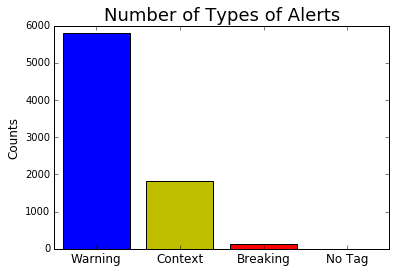

In [21]:
#Plot alert tags and counts
plt.bar(np.arange(len(tags)), counts, align='center', color=['b', 'y', 'r', 'k'])
plt.xticks(np.arange(len(tags)), tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Number of Types of Alerts', fontsize=18)

**Most alerts should be in the Warning Tag**

In [22]:
# Check for duplicate URL's
df.loc[(df['URL'].duplicated())]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
118,"Rocky Neck, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-73.623177,41.012321,XXXXXX FOX 61,NaN
119,"Silver Sands Beach, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-72.877174,41.244175,XXXXXX FOX 61,NaN
120,"Wadsworth Falls, Connecticut, United States",United States,Waterborne Illness,Humans,5274123,Swim areas at some state beaches closed due to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:06,Warning,2,-72.69648,41.52565,XXXXXX FOX 61,NaN
122,"Milford, Connecticut, United States",United States,Waterborne Illness,Humans,5273209,"Hammonasset, Silver Sands, Portion Of Rocky Ne...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:05,Warning,0,-73.056503,41.222321,XXXXXX Hartford Courant,NaN
123,"East Lyme, Connecticut, United States",United States,Waterborne Illness,Humans,5273209,"Hammonasset, Silver Sands, Portion Of Rocky Ne...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:05,Warning,0,-72.229523,41.353149,XXXXXX Hartford Courant,NaN
125,"Oak Beach County Park, Port Austin, Michigan, ...",United States,Waterborne Illness,Humans,5273208,Three local beaches closed Thursday - Huron Da...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:02,Warning,1,-83.127449,43.996399,NaN,NaN
126,"Thompson County Park, Caseville, Michigan, Uni...",United States,Waterborne Illness,Humans,5273208,Three local beaches closed Thursday - Huron Da...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/24/17 17:02,Warning,1,-83.133904,43.993069,NaN,NaN
136,"Jupiter, Florida, United States",United States,Waterborne Illness,Humans,5268606,"Bacteria warning: Midtown, Phipps beaches clos...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/22/17 20:57,Warning,0,-80.094208,26.934219,XXXXXX Palm Beach Daily News,NaN
154,"Silver Sands State Park, Connecticut, United S...",United States,Waterborne Illness,Humans,5259302,Lake Waramaug State Park among beaches closed ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/18/17 11:35,Warning,0,-73.070938,41.202599,XXXXXX Danbury News Times,NaN
155,"Indian Well State Park, Connecticut, United St...",United States,Waterborne Illness,Humans,5259302,Lake Waramaug State Park among beaches closed ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/18/17 11:35,Warning,0,-73.130112,41.34621,XXXXXX Danbury News Times,NaN


**A single news article can reference multiple places.  Each row in the dataset is a location.**

In [23]:
#Use regex to get boil orders from headlines?  
#Web scraper to pull boil order - need BS 
import requests
from bs4 import BeautifulSoup

# Web Scraping

**I will write a web scraping function when I learn more about how to handle many different errors.  The cells below will show how I web scraped each URL in the data set by copy and pasting the same code over and over.  I had to do this due to time constraints and because the method below allowed some HTML text to get returned even if a bad website broke my web scraper.** 

In [49]:
# Web scraper function
# I will stay with what I know workds due to time constraints and clean this up later.
def get_soups(df, column, start):
    soups = {}
    counter = 0
    for index, url in enumerate(df[column]):
        if index < start:
            counter +=1
            pass
        else:
            res = requests.get(url)
            if res.status_code == 404 or res.status_code == 410:
                df.at[index, column] == 'deleted' 
            elif res.status_code != 200:
                print('Failed! Status code: ', res.status_code)
                print(index, url)
                continue
            else:
                soup = BeautifulSoup(res.content, 'lxml')
                soups[index] = soup
                counter += 1
                time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

# Web Scraping - Many Rounds With A Loop

**I changed the counter (starting point) each time the web scraper would break from an error.  I don't know how to handle the many errors I came across and I didn't know what kind of errors I would run into until I ran the loop multiple times.**

**Below is the results from my web scraping.  Every time the scraper broke, I would save whatever HTML was gathered as a .csv.  These .csv's were combined later.  See the "Comine Soups" notebook.**

In [24]:
# Import time to add a break between requests.
import time

In [25]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    res = requests.get(url)
    counter += 1
    if res.status_code == 404 or res.status_code == 410:
        df.at[index, 'URL'] = 'deleted'
        print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
        print(url)
    elif res.status_code != 200:
        print('Failed! Status code: ', res.status_code)
        print(index, url)
    else:
        soup = BeautifulSoup(res.content, 'lxml')
        soups[index] = soup
        time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed! Status code:  403
18 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE1ftT7ndvpyp9m53cCdop1iHxkSA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OVPiWaiZD9bUzAKg7rq4Cw&url=https://ocmonitor.com/2017/10/14/psc-ends-redundant-reporting-requirement/
Failed!  Status code:  404 Deleted URL @ index:  23
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFMEQbuq-swLVt1OCA2TgN-jgv05Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779634289852&ei=Ms_eWaCeKoPP3gH74LHoAQ&url=http://www.kmvt.com/content/news/About-100-Jerome-homes-under-boil-order-450494433.html
Failed!  Status code:  404 Deleted URL @ index:  46
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEZtzZjMBTboMy0ZJuNLvdqgVqvFg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779616411416&ei=RUzHWbjsN8TP3AHPgqXoDg&url=http://www.wibw.com/content/news/Boil-order-for-the-City-of-Mayetta-Jackson-Co-lifted-447210293.html
Failed!  Status code:  404 Deleted URL @ index:  55
http://news.google.com/news/url?sa=t&fd=R&ct2

ConnectionError: HTTPConnectionPool(host='www.', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195C1A705C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [26]:
# Shows row indexes that are saved
soups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,

In [27]:
#check index 873 - failed - max retries? 
# Found DNS address can't be reached.  Gives this url: http://www./#2/67672274-3a3c-5d7c-8d5d-7755ad88fbce.html
df.URL[873]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNER20aDIS3C1S-_iOWzSBW1ONeArw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779345432417&ei=YZR5WODcKoOh3gGGy73IAQ&url=http://www.fayobserver.com/news/local/overhills-boil-water-advisory-rescinded-no-coliform-bacteria-found/article_67672274-3a3c-5d7c-8d5d-7755ad88fbce.html'

In [28]:
# Turn dictionary into dataframe
batch1 = pd.DataFrame()
batch1['index'] = soups.keys()
batch1['HTML'] = soups.values()

# Save dataframe as .csv.  This save my progress with the web scraper.
batch1.to_csv('./batch1.csv')
df.to_csv('./HealthMap_Partial.csv')

In [29]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 873:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Failed!  Status code:  404 Deleted URL @ index:  880
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHzcX86__RI0SDN9gkeZC7ZfoH52A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779339286955&ei=oUh2WNCgJIO7pweE1Z_ICg&url=http://www.valleymorningstar.com/news/state/article_071214b4-c929-5d5b-94dc-bddb6ee97d70.html
Failed! Status code:  403
883 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEhGKGule8O6yQa9BIA6LJh5kHwpQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=o2d1WJiJJNOU3QGw14GQDQ&url=http://www.ellsworthamerican.com/maine-news/franklin-water-customers-boil-water-order/
Failed!  Status code:  404 Deleted URL @ index:  926
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGPhO-S9pFbzcf9amZuqpqa9ZTdBA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779317343241&ei=anRdWKDXF8Oh3gHg5JCABA&url=http://www.wcax.com/story/34121928/boil-water-order-lifted-in-addison-county
Failed! Status code:  403
933 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHwr0XoMmOBB

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /100517/pipe-damage-prompts-boil-advisory (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195DA280358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [30]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1024, 1025, 1026, 1027, 1028, 1029, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1063, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 874, 875, 876, 877, 878, 879, 881, 882, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 927, 928, 929, 930, 931, 932, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 975, 976, 977, 978, 980, 981, 982, 983, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 99

In [31]:
#Check 1097 - max retries error
# DNS error.  Links to http://www.myjournalcourier.comnews/100517/pipe-damage-prompts-boil-advisory
# Seems that a '/' is missing between '.com' and 'news'.  Will work if added..
df.URL[1097]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFXe3J7FEpSxKdA0YWwXkU_un2ozQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=YFriV8jHCo6G3AG_26X4Ag&url=http://myjournalcourier.com/news/100517/pipe-damage-prompts-boil-advisory'

In [32]:
# Turns dictionary into a dataframe
batch2 = pd.DataFrame()
batch2['index'] = soups.keys()
batch2['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch2.to_csv('./batch2.csv')
df.to_csv('./HealthMap_Partial.csv')

In [33]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1097:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0


ConnectionError: HTTPSConnectionPool(host='wabi.tv', port=443): Max retries exceeded with url: /2016/09/08/boil-water-order-for-parts-of-ellsworth/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000195DD59D780>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [34]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113])

In [35]:
#Check index 1114 - Connection Refused Error
#Wabi.tv refused to connect
df.URL[1114]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFoqh_AT1VgMtjFGDzWKpVH1UVTHg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779205534879&ei=0_jSV-CtEMzI3QHWtoeoAg&url=https://wabi.tv/2016/09/08/boil-water-order-for-parts-of-ellsworth/'

In [36]:
# Turns dictionary into dataframe
batch3 = pd.DataFrame()
batch3['index'] = soups.keys()
batch3['HTML'] = soups.values()

# Saves dataframe as .csv.  This saves the progress of my web scraper.
batch3.to_csv('./batch3.csv')
df.to_csv('./HealthMap_Partial.csv')

In [37]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1114:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1130
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHE-oVEbbdIfqeCV_S9vK9VoUG93g&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779198135654&ei=yC7KV4i7I8ak3gH_mb_ADA&url=http://www.goskagit.com/news/state/water-safe-again-in-carbonado-after-drilling-accident/article_a8086b5c-5bc1-5232-a5ba-8453ff602243.html
Failed!  Status code:  404 Deleted URL @ index:  1133
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGqMps1yn1GTP65_FXbwwCuUJWHcg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779197860347&ei=iPbJV5nsA4SH3AHCoINQ&url=http://www.ccenterdispatch.com/news/state/article_c8b3e764-f679-519b-984e-ece8b7cc31f0.html
Failed!  Status code:  404 Deleted URL @ index:  1141
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEL7aJTTwbKq3ypU004O4__XUVzhQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779195556931&ei=mDfHV9CgJIKU3QGe-42YAQ&url=http://kwqc.com/2016/08/31/lake-storey-beach-closed-today-for-sanitary-reason

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /98996/boil-water-precaution-is-lifted (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000195E547D8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [38]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1131, 1132, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1153, 1154, 1155, 1156, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209])

In [39]:
#Check 1210 - Max retries error
#DNS not found.  Links to: http://www.myjournalcourier.comnews/98996/boil-water-precaution-is-lifted
# Seems that a '/' is missing between '.com' and 'news'.  Will work if added..
df.URL[1210]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH_OwH9B1C6bacxwHWJrIxP0yfWHQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=i_WsV7ixIdKf3wHyk43oCQ&url=http://myjournalcourier.com/news/98996/boil-water-precaution-is-lifted'

In [40]:
#Turns dictionary into dataframe
batch4 = pd.DataFrame()
batch4['index'] = soups.keys()
batch4['HTML'] = soups.values()

#Saves dataframe as a .csv.  This saves the progress of my web scraper. 
batch4.to_csv('./batch4.csv')
df.to_csv('./HealthMap_Partial.csv')

In [41]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1210:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1266
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEcNSCN8VCqooKAVLhL5wSEg6muxw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779167555328&ei=GIyWV9ivLNG43gHFuLigBw&url=http://baytownsun.com/texas_ap/article_ed3aebc9-31de-5fda-b190-68773caf156a.html
Failed!  Status code:  404 Deleted URL @ index:  1274
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEtdK9nkNqNmkzhOEhSDjkbHbsQug&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779165587551&ei=cXuSV8i7DpSL3AGV0ZHoAg&url=http://wbt.com/ramsey-creek-park-beach-closed-due-to-high-levels-of-fecal-matter/


ConnectionError: HTTPConnectionPool(host='www.', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196053F6860>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [42]:
#Shows row indexes that are saved
soups.keys()

dict_keys([1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1275, 1276])

In [43]:
#Check URL 1277 - Connection Error
# Bad link - returns bad URL: http://www./#2/df420466-4ed2-5513-a6f4-aedee1fd389e.html
df.URL[1277]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGFYi9-OA8yCewzNr97utvxRiniMQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=N0OSV8i3OcvepwfS5KwY&url=http://www.fayobserver.com/news/local/bladen-county-officials-testing-white-lake-for-ties-to-skin/article_df420466-4ed2-5513-a6f4-aedee1fd389e.html'

In [44]:
# Turns dictionary into dataframe
batch5 = pd.DataFrame()
batch5['index'] = soups.keys()
batch5['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch5.to_csv('./batch5.csv')
df.to_csv('./HealthMap_Partial.csv')

In [45]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1277:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  410 Deleted URL @ index:  1319
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG0Q1iBqltTg0cunUGfa47Jd0DTkQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779157650938&ei=lkmGV6inNIWQ3AHeyrbwAw&url=http://www.fairfieldcitizenonline.com/news/texas/article/Corpus-Christi-names-new-city-manager-after-water-8356442.php
Failed!  Status code:  404 Deleted URL @ index:  1337
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHozfkEG9fVF8N3spYk49vLq9mA_Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779146850831&ei=dd95V4iRMYi_3gHnwo_oCg&url=http://kwgn.com/2016/07/02/boulder-reservoir-swim-beach-closed-sunday-hopefull-for-4th-of-july/
Failed!  Status code:  404 Deleted URL @ index:  1338
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHozfkEG9fVF8N3spYk49vLq9mA_Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779146850831&ei=9I14V5iMI9XG3gHDo4HoAg&url=http://kwgn.com/2016/07/02/boulder-reservoir-swim-beach-closed-sunday-hopefull-for-4th-of-j

ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /97183/boil-order-lifted-for-city-residents (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001960C89DA20>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [46]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1339, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1278, 1279])

In [47]:
#Check 1361 - Connection error
#DNS not found.  Links me to: http://www.myjournalcourier.comnews/97183/boil-order-lifted-for-city-residents
#Seems that forward slash is missing between .com and news.  Will work if added..
df.URL[1361]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEb-A1FREPrid5ARTh5T_42Nr-1dw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142850784&ei=VH10V8CgCoy23gHClKSgDQ&url=http://myjournalcourier.com/news/97183/boil-order-lifted-for-city-residents'

In [48]:
# Turns dictionary into a dataframe
batch6 = pd.DataFrame()
batch6['index'] = soups.keys()
batch6['HTML'] = soups.values()

# aves dataframe as a .csv.  This saves the progress of my web scraper.
batch6.to_csv('./batch6.csv')
df.to_csv('./HealthMap_Partial.csv')

In [49]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1361:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0


ConnectionError: HTTPConnectionPool(host='www.myjournalcourier.comnews', port=80): Max retries exceeded with url: /97133/city-under-immediate-water-emergency (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001960CD42710>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [50]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1362, 1363, 1364, 1365, 1366])

In [51]:
#Check 1367.  Connection error
#DNS not found.  Links me to : http://www.myjournalcourier.comnews/97133/city-under-immediate-water-emergency
#Seems that forward slash is missing between .com and news.  Will work if added..
df.URL[1367]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEHYuqOH0hohOM9JGlV6TkVFCuVYg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142850784&ei=EYNyV-C7NYeM3wGD74XYBw&url=http://myjournalcourier.com/news/97133/city-under-immediate-water-emergency'

In [52]:
# Turns dictionary into dataframe
batch7 = pd.DataFrame()
batch7['index'] = soups.keys()
batch7['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch7.to_csv('./batch7.csv')
df.to_csv('./HealthMap_Partial.csv')

In [52]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1367:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed! Status code:  403
1370 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGOvki3AUyNKCnaVnF_Rwt0DZNB8A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=7IVxV6qQEtLP3QGMroyoBQ&url=http://www.kirklandreporter.com/news/384537681.html
Failed!  Status code:  404 Deleted URL @ index:  1381
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHJI9hI0jv8tbPRFXp_QYfn9R7PYw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=-9doV-jUEI3U3gHTlJzoDA&url=http://www.citizen.com/news/2016-06-21/Local/Boil_Water_order_remains_in_effect_for_Mallards_La.html
Failed! Status code:  400
1382 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHTDdMzsjO-rJgAZ-lg8fqN8f2aOA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779136361067&ei=e2doV9ieCIjZ3gHQ-JuwCQ&url=http://salina.com/news/local/boil-water-order-issued-for-howison-heights/article_d7151843-8b3f-5ee0-ad83-45bd1024f23d.html
Failed! Status code:  406
1383 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG945wsxRVx923Fjwg-6S0_cB

ContentDecodingError: ('Received response with content-encoding: gzip, but failed to decode it.', error('Error -3 while decompressing data: incorrect header check',))

In [53]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1424, 1368, 1369, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1403, 1404, 1405, 1406, 1407])

In [55]:
#Check 1425 - Content Decoding Error
#Worked on chrome.  May need different beautiful soup library?
df.URL[1425]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH3_loMDf4SKEFDMT0jjFsGusyp7Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779116297232&ei=_gxDV-j1BYuA3wH3xqeoAw&url=http://www.huffingtonpost.com/entry/water-systems-health-boil-orders_us_57363feee4b060aa781a6244'

In [56]:
# Turns dictionary into dataframe
batch8 = pd.DataFrame()
batch8['index'] = soups.keys()
batch8['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch8.to_csv('./batch8.csv')
df.to_csv('./HealthMap_Partial.csv')

In [84]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1425:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1426
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHktr7nKzAVAK087OA_Q28B8ODMrQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779114095084&ei=FEtBV7jtDcff3gHd2qTICg&url=http://www.kxii.com/content/news/Boil-order-issued-for-parts-of-Sherman-380373551.html
Failed!  Status code:  404 Deleted URL @ index:  1430
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEdt3LqT9aVkEdYx5fIYt3lyuu7lg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779112722317&ei=mBg_V5iGJYmV3AHO1qHACA&url=http://www.forsythnews.com/section/5/article/30192/
Failed!  Status code:  404 Deleted URL @ index:  1432
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFJ-AHIUar-pMH4ZKtqEWG46x3ANQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779106806501&ei=CgU8V7iuItyQ3wHth4KQBA&url=http://lubbockonline.com/texas/2016-05-18/texas-and-region
Failed!  Status code:  404 Deleted URL @ index:  1433
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=A

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=17498 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019657040748>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [85]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1427, 1428, 1429, 1431, 1434, 1436, 1437, 1438, 1439, 1440, 1441, 1443, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1469, 1470, 1471, 1473, 1474, 1475, 1479, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1529, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1559, 1560, 1562, 1563, 1564, 1565, 1566, 1567, 1570, 1572, 1573, 1574, 1576, 1577, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1612, 1613, 1615, 1616, 1617, 1618, 1620, 1621,

In [86]:
#Check 1978 - Connection error
#Site temporarily down or permenantly moved http://www.browncountyindiana.com/index.php?id=17498
df.URL[1979]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHi8HnZxKTVQDi1KVr0MzKmsjG_6Q&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=OR3FVZDoIYe43gH6xJSYDg&url=http://www.browncountyindiana.com/index.php?id%3D17498'

In [87]:
# Turns dictonary into dataframe
batch9 = pd.DataFrame()
batch9['index'] = soups.keys()
batch9['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch9.to_csv('./batch9.csv')
df.to_csv('./HealthMap_Partial.csv')

In [94]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 1979:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
Failed!  Status code:  404 Deleted URL @ index:  1980
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFWPTVeUL0Vf4_NiijS8X_1VPzCqw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=4sjEVdj6E4_D3gGoyaDgAg&url=http://www.heraldtimesonline.com/boil_orders/boil-orders-issued-for-some-eastern-heights-east-monroe-b/article_d2bbad74-a005-11e4-bd2d-438e4a7a9e1c.html
Failed!  Status code:  404 Deleted URL @ index:  1983
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG_EDxnssoVMqUxeRAIT-T8O-JgLw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778919248684&ei=6_XDVbifJ4zP3AHOt6vADQ&url=http://www.northjersey.com/news/water-service-resumes-after-crane-crushes-water-main-in-cliffside-park-1.1387744
Failed!  Status code:  404 Deleted URL @ index:  1987
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHnpLHO2c0Yk7K5Ad1hafqah2A0aQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778919248684&ei=x_jCVZCmN4To3gGNl5zYBw&url=http://www.northjersey.com/news/crane-crushes-water-pipe-in

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=17471 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001965AB2C518>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [95]:
# Shows row indexes that are saved
soups.keys()

dict_keys([1984, 1985, 1986, 1990, 1991, 1992, 1994, 1997, 1998, 1999, 2000, 2001, 1981, 1982])

In [96]:
#Check 2002 - Connection error
# Site temporarily down or permanently moved: http://www.browncountyindiana.com/index.php?id=17471
df.URL[2002]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGr_Kdfl4ofL0CGccCr2_I3lxXr-g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=3IK_VaOmN8L83QGtxK-oBg&url=http://www.browncountyindiana.com/index.php?id%3D17471'

In [97]:
# Turns dictonary into dataframe
batch10 = pd.DataFrame()
batch10['index'] = soups.keys()
batch10['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch10.to_csv('./batch10.csv')
df.to_csv('./HealthMap_Partial.csv')

In [98]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2002:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2003
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFJ-82OYkDLhlNddy5L5W2Dyday2Q&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=Ftq-VejjC82a3QGtxY6wDA&url=http://www.ksat.com/content/pns/ksat/news/2015/08/02/--boil-water-notice-issued-for-certain-areas-of-fredericksburg.html
Failed!  Status code:  404 Deleted URL @ index:  2012
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGj14_4YyIAa0EsJiK80FPMM6arbA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778914875597&ei=m8a7VajaI4GB3gHU-IDYCw&url=http://www.newsnet5.com/news/local-news/oh-cuyahoga/edgewater-beach-closed-due-to-wave-height-villa-angela-closed-for-e-coli-bacteria
Failed!  Status code:  404 Deleted URL @ index:  2018
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFFmY6yCbXxyAy78l1N5okmz90c-g&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778913141554&ei=sz-5VZC2CMWQ3gGD0oCwCA&url=http://www.localsyr.com/story/d/story/boil-water-order-in-aurel

ConnectionError: HTTPConnectionPool(host='www.murphysboroamerican.com', port=80): Max retries exceeded with url: /article/20150331/NEWS/150339829/1994/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019674BE5780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [99]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2048, 2049, 2050, 2051, 2052, 2053, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2068, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2100, 2101, 2102, 2104, 2105, 2107, 2108, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2153, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2173, 2174, 2175, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2216, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2229, 2230, 2231, 2232,

In [100]:
#Check 2357 - Connection Error
#DNS not found - http://www.murphysboroamerican.com/article/20150331/NEWS/150339829/1994/NEWS
df.URL[2357]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFdMgZymLzbB03u3ZjlZRjPCuOeGQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=TAsbVYSIDYTA3QHO6oGoBg&url=http://www.murphysboroamerican.com/article/20150331/NEWS/150339829/1994/NEWS'

In [101]:
# Turns dictionary into dataframe
batch11 = pd.DataFrame()
batch11['index'] = soups.keys()
batch11['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch11.to_csv('./batch11.csv')
df.to_csv('./HealthMap_Partial.csv')

In [102]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2357:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2359
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFXwRQHVgDyykr_c0SZyty3EYvkIg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778787657502&ei=nY8ZVdCMAYTA3QHO6oGoBg&url=http://www.northjersey.com/community-news/2.4225/millburn-water-main-break-wreaks-havoc-boil-water-order-lifted-1.1298997
Failed!  Status code:  404 Deleted URL @ index:  2361
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnG56lpr5fYweVEss-9SFiN1XNiA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778788436806&ei=nOwWVZDCBIHW3QHH4YOgCg&url=http://www.nonpareilonline.com/news/state/wire/water-boil-advisory-for-eastern-iowa-town-lifted/article_7163ce30-907c-511f-8b90-27d37461ab09.html
Failed!  Status code:  410 Deleted URL @ index:  2365
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH5g8bio8I3ZlImAfaMxWcA5j-ZHw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778783727674&ei=TyITVZCYEs_E3QGAyILIBA&url=http://www.dailyjournal.net/vie

ConnectionError: HTTPConnectionPool(host='www.murphysboroamerican.com', port=80): Max retries exceeded with url: /article/20150121/NEWS/150129804/1994/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001967D29A898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [104]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2432, 2434, 2436, 2437, 2438, 2439, 2440, 2441, 2444, 2447, 2449, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2358, 2360, 2362, 2363, 2364, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2381, 2383, 2384, 2385, 2388, 2390, 2392, 2394, 2395, 2396, 2398, 2399, 2400, 2404, 2405, 2406, 2407, 2410, 2411, 2412, 2416, 2418, 2423, 2424, 2431])

In [105]:
#Check 2458 - Connection error
#DNS not found http://www.murphysboroamerican.com/article/20150121/NEWS/150129804/1994/NEWS
df.URL[2458]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHNDI-ozjc-Kca9ZtXgF3Gq2ez5-A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=0EvAVLjDG-epwQGaxICYBA&url=http://www.murphysboroamerican.com/article/20150121/NEWS/150129804/1994/NEWS'

In [106]:
# Turns dictionary into dataframe
batch12 = pd.DataFrame()
batch12['index'] = soups.keys()
batch12['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch12.to_csv('./batch12.csv')
df.to_csv('./HealthMap_Partial.csv')

In [107]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2458:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2473
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNF97lQIEZBxE7JxwzdlRZWCg95ypA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=Poe6VLC9EMHywQHJuoCACw&url=http://www.wect.com/story/27874958/officials-issue-precautionary-boil-water-advisory-for-sea-spray-landing-area
Failed!  Status code:  404 Deleted URL @ index:  2477
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEoowp8Q-xlsdxFhitT7LR_r5HTfw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778713056680&ei=nDi4VJmkG7PvwQGWu4CICA&url=http://wthitv.com/2015/01/15/boil-order-for-indiana-american-water-customers-in-merom/
Failed!  Status code:  404 Deleted URL @ index:  2480
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEahA0pUB33CDzR-Jx3gm8boVIB6A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ezu3VOjdDYrUgQeOx4DABQ&url=http://www.wsvn.com/story/27844067/boil-water-advisory-issued-for-part-of-miami
Failed!  Status code:  404 Deleted URL @ index:  2481
http

ConnectionError: HTTPConnectionPool(host='www.littlerivernews.net', port=80): Max retries exceeded with url: /articles/2014/10/16/news/doc543fecd01fe57876272143.txt (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019688039A58>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [108]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2561, 2562, 2565, 2566, 2567, 2568, 2569, 2572, 2573, 2576, 2577, 2580, 2582, 2583, 2584, 2586, 2587, 2589, 2592, 2593, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2605, 2606, 2607, 2608, 2609, 2610, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2474, 2475, 2476, 2478, 2479, 2482, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2497, 2498, 2499, 2501, 2502, 2503, 2505, 2507, 2508, 2509, 2510, 2512, 2513, 2514, 2515, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2527, 2528, 2529, 2532, 2533, 2534, 2535, 2536, 2537, 2540, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2551, 2552, 2556, 2558, 2559])

In [109]:
# Check 2611 - Connection error
# DNS not found link: http://www.littlerivernews.net/articles/2014/10/16/news/doc543fecd01fe57876272143.txt
df.URL[2611]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEsEeg3oPHOgvkDX-qeOxagDs-bWg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ooNBVICgH-akwQGmnoGIDw&url=http://www.littlerivernews.net/articles/2014/10/16/news/doc543fecd01fe57876272143.txt'

In [110]:
# Turns dictionary into dataframe
batch13 = pd.DataFrame()
batch13['index'] = soups.keys()
batch13['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch13.to_csv('./batch13.csv')
df.to_csv('./HealthMap_Partial.csv')

In [111]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2611:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2617
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNETbrnaK7NRJF6TBEZ06wM1NQWaxw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778634490766&ei=U1xAVOCJHMjkwQGv9oGIDw&url=http://www.therepublic.com/view/story/cdf79b3bf46b47b3be1d934c59f8db48/UT--Boil-Advisory


ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=16359 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196897DA208>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [116]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2612, 2613, 2614, 2615, 2616, 2618, 2619, 2620])

In [113]:
#CHeck 2621 - Connection error
#Site temporarily down or permanently moved: http://www.browncountyindiana.com/index.php?id=16359
df.URL[2621]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHihY7CN5nhq2EXTnTCrJWoICAu2w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778633568285&ei=b7Y-VNj9EsKswAH3tIHYCg&url=http://www.browncountyindiana.com/index.php?id%3D16359'

In [117]:
# Turns dictionary into dataframe
batch14 = pd.DataFrame()
batch14['index'] = soups.keys()
batch14['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch14.to_csv('./batch14.csv')
df.to_csv('./HealthMap_Partial.csv')

In [118]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2621:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0


TooManyRedirects: Exceeded 30 redirects.

In [119]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2622, 2623])

In [120]:
#Check 2624 - too many redirects
# DNS not found: http://bookmark/25955705
df.URL[2624]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEI8z39wJlcLLs7b_pY9sviphvsYQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778633458700&ei=VZo-VMCgCsjkwQGv9oGIDw&url=http://sdnews.com/view/full_story/25955705/article-Children-s-Pool-beaches-closed-amid-sewage-leak?instance%3Dupdate1'

In [121]:
# Turns dictionary into dataframe
batch15 = pd.DataFrame()
batch15['index'] = soups.keys()
batch15['HTML'] = soups.values()

# Saves dataframe as a .csv.
batch15.to_csv('./batch15.csv')
df.to_csv('./HealthMap_Partial.csv')

In [122]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2624:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2626
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNF38ujqR7G-bsz-JWAKCttqo0mfnw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778632858197&ei=Trk9VNitA8jkwQGv9oGIDw&url=http://www.therepublic.com/view/story/522cba0fa8f2458aad44997f6e251d25/MS--Bay-St-Louis-Boil-Order
Failed!  Status code:  404 Deleted URL @ index:  2630
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGdPqVTq6ZHj25cTFTIaojwrVi8IQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=F-w6VNiyK8HVgAe09YHYDQ&url=http://www.wtvq.com/story/d/story/boil-water-advisory-for-parts-of-owsley-county/18561/kVrrFUgm-0WwxV1wkTyQmQ
Failed!  Status code:  404 Deleted URL @ index:  2638
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEYnmJ-XnUeGsDn-nW2nqFs329-mQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778627453813&ei=xH40VMqvEsfIwAHtz4HACw&url=http://www.kwtx.com/ourtown/home/headlines/Killeen--Boil-Order-Issued-For-Some-Neighborhoods-278444141.html
F

ConnectionError: HTTPConnectionPool(host='tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001968B62E7F0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [123]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2625, 2627, 2628, 2629, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2639, 2640, 2642, 2643])

In [124]:
# Check 2644 - Connection error
# Site may be temporarily down or permenantely moved: 
# http://tristate-media.com/drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html
df.URL[2644]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEs9jh7yK_1PIfnBYRu1dC5HQPwgw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=kQ4vVIjZGcy6wAGLhYGYDA&url=http://tristate-media.com/drr/news/local_news/article_82f9cfb8-4b3d-11e4-9da2-771094aca821.html'

In [125]:
# Turns dictionary into a dataframe
batch16 = pd.DataFrame()
batch16['index'] = soups.keys()
batch16['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch16.to_csv('./batch16.csv')
df.to_csv('./HealthMap_Partial.csv')

In [126]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2644:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2648
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHkG91XUlPqUA3kmLLaHgTXh5g7HQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778623383944&ei=QOctVOnyBs7Gggf1gYGoBg&url=http://www.wcax.com/story/26691988/water-woes-in-fair-haven
Failed! Status code:  503
2650 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHHw3ZIIjUJ6R7pMb1P29d2MSNyzQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=wJUsVLjDG8LGwAHPtYG4CA&url=http://www.lakeconews.com/index.php?option%3Dcom_content%26view%3Darticle%26id%3D38619:boil-water-notice-issued-for-30-lakeport-homes-near-water-main-break%26catid%3D1:latest%26Itemid%3D197
Failed!  Status code:  404 Deleted URL @ index:  2652
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGhZMGd1UIOMtBPQ0SRcaFXWa1erA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778621991144&ei=kWssVJChD8KswAGCsYHgDQ&url=http://www.ky3.com/news/local/loss-of-pressure-causes-greenfield-to-issue-boil-water-order/

ConnectionError: HTTPConnectionPool(host='glencoe.suntimes.com', port=80): Max retries exceeded with url: /2014/09/23/main-work-causes-boil-order-green-bay-residents/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001968D385780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [127]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2658, 2659, 2660, 2661, 2662, 2664, 2665, 2666, 2645, 2646, 2647, 2649, 2651, 2654])

In [128]:
# Check 2667 - Connection error
#DNS address not found http://glencoe.suntimes.com/2014/09/23/main-work-causes-boil-order-green-bay-residents/
df.URL[2667]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHx-8HD8ajo-3o6zyJ-6wPb0mPB7A&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=WbUhVJDuH8LGwAHHnYGgDg&url=http://glencoe.suntimes.com/2014/09/23/main-work-causes-boil-order-green-bay-residents/'

In [129]:
# Turns dictionary into dataframe
batch17 = pd.DataFrame()
batch17['index'] = soups.keys()
batch17['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch17.to_csv('./batch17.csv')
df.to_csv('./HealthMap_Partial.csv')

In [130]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2667:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2672
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHoGlCKHPHhJPJiVaV8_FUOpaKkuw&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=qDkgVKiYOaXVwQG8j4CYBQ&url=http://www.fox28.com/story/26593777/2014/09/22/boil-water-advisory-issued-for-etna-green
Failed!  Status code:  410 Deleted URL @ index:  2673
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEgaS0lqJxMO-Ouy66Lso2hy0QLWg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778614446421&ei=5ZAfVNjlGoqTggfQoIGgCg&url=http://www.14news.com/story/26587578/first-round-of-jasper-water-samples-pass-test
Failed!  Status code:  404 Deleted URL @ index:  2678
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEQgSWGSqFOILaqoEEr5aGuhDk80A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778611569733&ei=gvYZVIiPCIbawAG70ICwBQ&url=http://www.kmvt.com/news/local/Twin-Falls-City-Lifts-Boil-Water-Order-For-School-And-Church-Impacted-By-Waterline-Break-275504741.html
Failed!  St

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000019693170438>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [132]:
# Showsrow indexes that are saved
soups.keys()

dict_keys([2688, 2689, 2690, 2692, 2694, 2695, 2696, 2697, 2701, 2702, 2704, 2705, 2706, 2707, 2710, 2711, 2712, 2715, 2717, 2718, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2740, 2741, 2742, 2743, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2758, 2759, 2760, 2762, 2763, 2668, 2669, 2670, 2671, 2674, 2675, 2676, 2677, 2681, 2682, 2684, 2685, 2687])

In [133]:
#Check 2768 - Connection error
# Site is temporarily down or permenantely removed http://www.tristate-media.com/drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html
df.URL[2768]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNH9nd44tjj3uw2gzzc5-rpAym-ppQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778590600814&ei=a6_3U6CQBcLKgAfrnYH4CQ&url=http://www.tristate-media.com/drr/article_90d8d854-2a31-11e4-a113-001a4bcf887a.html'

In [134]:
# Turns dictionary into dataframe
batch18 = pd.DataFrame()
batch18['index'] = soups.keys()
batch18['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch18.to_csv('./batch18.csv')
df.to_csv('./HealthMap_Partial.csv')

In [135]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2768:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2777
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG3VGn4hJSWsYNkW-g3g8SJlmHN9Q&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778587459112&ei=mjb1U-ibI4vHggf854CQCQ&url=http://www.greenwichtime.com/news/science/article/Vermont-town-lifts-boil-water-order-5701445.php
Failed!  Status code:  404 Deleted URL @ index:  2782
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE6IAdB34rl9KYeEjmeGRZivpNI9A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778588717363&ei=Crj0U5bcGMHlwAHFxYDoDQ&url=http://www.wktv.com/news/local/Boil-advisory-issued-for-parts-of-the-Town-of-Annsville-271995761.html
Failed!  Status code:  404 Deleted URL @ index:  2787
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEs3Lh1yMq_1BbVBhqu5qI1VUyYow&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778587815439&ei=Oj_yU5CjOIbawAGhnYCYCg&url=http://www.kndyradio.com/2014/08/boil-water-advisory-issued-for-the-city-of-clifton/
Failed!  Statu

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=16097 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969ADAD080>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [136]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2816, 2817, 2818, 2819, 2820, 2821, 2823, 2828, 2829, 2830, 2831, 2834, 2836, 2839, 2840, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2778, 2779, 2780, 2781, 2783, 2784, 2785, 2786, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2815])

In [137]:
# Check 2875 - Connection error
# Page temporarily down or permenantly removed 
# http://www.wbiw.com/local/archive/2014/08/residents-north-of-us-50-loogootee-dover-hill-trinity-springs-under-boil-order.php
df.URL[2875]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEZlQOFt0U7PlirMWaeMcbu1XbPag&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778570939016&ei=owrYU7q6HsTAggeWuYHQDg&url=http://www.browncountyindiana.com/index.php?id%3D16097'

In [138]:
# Turns dictionary into dataframe
batch19 = pd.DataFrame()
batch19['index'] = soups.keys()
batch19['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch19.to_csv('./batch19.csv')
df.to_csv('./HealthMap_Partial.csv')

In [139]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2875:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0


ConnectionError: HTTPConnectionPool(host='www.jrn.com', port=80): Max retries exceeded with url: /ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969C13E7B8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [140]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2876, 2877])

In [141]:
# Check 2878 - Connection error
# DNS not found: http://www.jrn.com/ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html
df.URL[2878]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNETPPYLyogQTh25jY6iymmy5HH5kg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=ceDXU8GxIZDugAfW5oGQCg&url=http://www.jrn.com/ktnv/news/Boil-water-notice-issued-for-Lower-Rainbow-Subdivision-268964501.html'

In [142]:
# Turns dictionary into dataframe
batch20 = pd.DataFrame()
batch20['index'] = soups.keys()
batch20['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch20.to_csv('./batch20.csv')
df.to_csv('./HealthMap_Partial.csv')

In [143]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2879:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2880
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGZfh-TbVAQ3Z93UnLdrC_o5r2wjA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=JrnWU8CRD-r3mQKaoIHgCA&url=http://www.bcdemocrat.com/index.php?id%3D16088
Failed!  Status code:  404 Deleted URL @ index:  2884
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNG5dleo466ShpwSTiTDz55PwAh5lg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778568606792&ei=aU7UU_WiBMqEmgKVooDYAw&url=http://www.myfoxtwincities.com/story/26121370/calhoun-beach-closed-with-high-e-coli-levels
Failed!  Status code:  410 Deleted URL @ index:  2888
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHA9-aX-BWEQGGy8CSDXUKHl0O9Nw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778567097497&ei=VJ3RU-v8POmBmgLfhoGwDA&url=http://www.abc6.com/story/26106870/high-bacteria-found-at-scarborough-beach
Failed!  Status code:  404 Deleted URL @ index:  2892
http://news.google.com/news/url?sa=t&fd=R&ct2=us&u

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140710/News/140719882 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969E6FB240>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [144]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2881, 2882, 2883, 2885, 2886, 2887, 2889, 2890, 2891, 2894, 2895, 2896, 2898, 2899, 2900, 2901, 2903, 2904, 2906, 2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918, 2919, 2922, 2923, 2927, 2928, 2929, 2931, 2932, 2934, 2935, 2936])

In [145]:
# Check 2937 - Connection Error
# DNS address not found - http://www.dailyamericannews.com/article/20140710/News/140719882
df.URL[2937]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEblWJZ6SGiiYjQK301ekO7B7YoPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778554676785&ei=S87AU7jqDoX4wAGNrIHIBA&url=http://www.dailyamericannews.com/article/20140710/News/140719882'

In [146]:
# Turns dictionary into dataframe
batch21 = pd.DataFrame()
batch21['index'] = soups.keys()
batch21['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch21.to_csv('./batch21.csv')
df.to_csv('./HealthMap_Partial.csv')

In [150]:
# Check 2938 - Timeout error
# Link is bad :http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[2938]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEblWJZ6SGiiYjQK301ekO7B7YoPQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778554676785&ei=S87AU7jqDoX4wAGNrIHIBA&url=http://www.dailyamericannews.com/article/20140710/News/140719882'

In [151]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2939:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2941
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFU0nVwW3egK3yCNnqLXlst6SPsGQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=IgG-U-iSJoaD8gGi_YHoCA&url=http://www.wbtw.com/story/25967658/major-water-line-break-in-georgetown-boil-water-advisory-issued


ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140709/NEWS/140709410/-1/news (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001969FB992E8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [153]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2944, 2945, 2946, 2940, 2942, 2943])

In [155]:
#Check 2947 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20140709/NEWS/140709410/-1/news
df.URL[2947]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEb6UyTD9PhT4khIH0bahEe8Ecg0g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=aFi9U-DlJ63uwAGryYDoCg&url=http://www.dailyamericannews.com/article/20140709/NEWS/140709410/-1/news'

In [154]:
# Turns dictionary into dataframe
batch22 = pd.DataFrame()
batch22['index'] = soups.keys()
batch22['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch22.to_csv('./batch22.csv')
df.to_csv('./HealthMap_Partial.csv')

In [156]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2947:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  410 Deleted URL @ index:  2949
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE20rs5MsJZDYDR2wyVTrt9HE4fAw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778552979234&ei=QVu8U6D6NcbswAGj0YAQ&url=http://www.therepublic.com/view/local_story/Eastern-Bartholomew-Water-Co-i_1404846494
Failed! Status code:  403
2951 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHhXNh7AqSLXqQSV05pBvUQCqO0KQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778552271650&ei=yAm7U-j-AsL98AHIwYH4DQ&url=http://impactnews.com/austin-metro/round-rock-pflugerville-hutto/pflugerville-sewage-spill-prompts-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  2955
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFQrw4pdnSfuQh0Drbzf-PQO3clwQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=9O21U5CMForKgAfYtoCwAQ&url=http://www.dailyastorian.com/free/astoria-responsible-for-water-boil-notice/article_18d9fb5e-02fd-11e4-9b84-001a4bcf887a.html
Failed!  St

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15937 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A05E50B8>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [158]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2948, 2950, 2952, 2953, 2954, 2960, 2962, 2963, 2964, 2965, 2967, 2968, 2969, 2970, 2971, 2972])

In [159]:
# Check 2973 - Connection error
# Site temporarily down or permenatly removed: http://www.browncountyindiana.com/index.php?id=15937
df.URL[2973]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHKo2Vn1QTfIyjVzjTAwMJSqGKDbw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778544276735&ei=boatU_HdGsLwgQfrw4GACw&url=http://www.browncountyindiana.com/index.php?id%3D15937'

In [160]:
# Turns dictionary into dataframe
batch23 = pd.DataFrame()
batch23['index'] = soups.keys()
batch23['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch23.to_csv('./batch23.csv')
df.to_csv('./HealthMap_Partial.csv')

In [161]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2973:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2976
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHSgv-9Q0WA1AAbfNVMf2DMwRiJ8A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543849536&ei=UImsU5jQHMq1gweEkoDIDg&url=http://www.myfoxchicago.com/story/25881402/waukegan-mandates-boil-order-for-some-water-customers
Failed!  Status code:  404 Deleted URL @ index:  2977
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHfvVHMk8T_y8Y7aLlYK8uQ6ow6Pw&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543780902&ei=IV-sU9CGA4TzggekqoHABA&url=http://www.cantondailyledger.com/article/20140626/NEWS/140629518/-1/sports
Failed!  Status code:  404 Deleted URL @ index:  2978
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFvkICtpHen9qclvP9EoPIsO0Qo9A&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778543158277&ei=8DSsU4jNHcWdgQff0oDIDw&url=http://www.kwtx.com/news/local/headlines/TSTC-Closed-Because-Of-Water-Main-Break-264576451.html
Failed!  Status code:  404 Dele

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20140624/NEWS/140629690 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A19DA048>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [162]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2979, 2980, 2981, 2983, 2974, 2975])

In [163]:
# Check 2984 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20140624/NEWS/140629690
df.URL[2984]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnUkiMknzbgPbI0RIZOZU3R2in1w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778542641967&ei=I7ypU4D_KYjkggfVxoHQCg&url=http://www.dailyamericannews.com/article/20140624/NEWS/140629690'

In [164]:
# Turns dictionary into dataframe
batch24 = pd.DataFrame()
batch24['index'] = soups.keys()
batch24['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch24.to_csv('./batch24.csv')
df.to_csv('./HealthMap_Partial.csv')

In [165]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 2984:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
Failed!  Status code:  404 Deleted URL @ index:  2985
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGydq_2q3FBISup3yUbKvdAmMHcCA&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=I7ypU4D_KYjkggfVxoHQCg&url=http://www.siouxlandmatters.com/story/d/story/boil-order-walthill-water-main/47960/nmVVJcM3J0u__g4KG6iULA
Failed!  Status code:  404 Deleted URL @ index:  2988
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNHB4618zaX-JVKhPJe4AN8nfq7AAQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778541783279&ei=1JSoU_CiBMv5ggeO6IGoBQ&url=http://quincyjournal.com/regional-beat/2014/06/23/hannibal-under-48-hour-boil-order/
Failed!  Status code:  404 Deleted URL @ index:  2991
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEMofxbAjjvC0VzB354S1E3NEcLtg&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778542099419&ei=uHioU4D6AcW0gwf-kYGYCg&url=http://www.necn.com/06/23/14/Beaches-closed-after-sewage-spills-into-/landing.html?blockID%3D868313%26feedID%3D11106
Failed!  S

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15908 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A362B8D0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [166]:
# Shows row indexes that are saved
soups.keys()

dict_keys([2986, 2987, 2989, 2990, 2992, 2993, 2995, 2997, 2998, 2999, 3001, 3002, 3003, 3004])

In [167]:
# Check 3005 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15908
df.URL[3005]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEC9WMatApp_-L5Et9ykJTMV_XHxg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=jSeiU8j2JMnrgQfEyYDABA&url=http://www.browncountyindiana.com/index.php?id%3D15908'

In [168]:
# Turns dictionary into dataframe
batch25 = pd.DataFrame()
batch25['index'] = soups.keys()
batch25['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch25.to_csv('./batch25.csv')
df.to_csv('./HealthMap_Partial.csv')

In [169]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3005:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  503
3007 http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGOahZpRCoxkZPm8i3viiKhU7dZLQ&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=K9OhU4jWGtHzggeL_4CAAg&url=http://www.lakeconews.com/index.php?option%3Dcom_content%26view%3Darticle%26id%3D37264:lakeport-water-main-break-causes-street-closure-limited-boil-water-order%26catid%3D1:latest%26Itemid%3D197
Failed!  Status code:  404 Deleted URL @ index:  3010
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGbmnJUZKEHZgyHofstlTTV62Si8w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778538147849&ei=26ugU4i4JITzggf75IDABQ&url=http://www.ksdk.com/story/news/local/2014/06/17/wentzville-subdivisions-boil-water-order/10679867/
Failed!  Status code:  410 Deleted URL @ index:  3017
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNFE1r-Yd2IpaTvuzQNqAyVnoqnT9w&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778532709944&ei=n-GcU7PnAsnrgQeW04DwDg&url=http://www.dailyjournal.net/view/story/54

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15744 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196A99BBFD0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [179]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3209, 3211, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3228, 3229, 3230, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3241, 3242, 3243, 3247, 3248, 3249, 3254, 3255, 3256])

In [171]:
# Check 3112 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15744
df.URL[3112]

'http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEnktymq-Yl83zaqC1pjFfrOr3Y5g&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=EDdiU_rFL5P5ggfCPg&url=http://www.browncountyindiana.com/index.php?id%3D15744'

In [172]:
# Turns dictionary into dataframe
batch26 = pd.DataFrame()
batch26['index'] = soups.keys()
batch26['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch26.to_csv('./batch26.csv')
df.to_csv('./HealthMap_Partial.csv')

In [173]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3112:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3113
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNE-jj9j_bCjd5964o_gtyUZuTTmhQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778491291055&ei=r-JhU6DRGcWngAf67AE&url=http://www.kcrg.com/subject/news/boil-water-advisory-issued-for-part-of-city-of-wyoming-20140501
Failed!  Status code:  410 Deleted URL @ index:  3114
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNGGOExYZwtO75aqdztH-6QmFIIttQ&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52778488476151&ei=MpFgU7DgLszPggfsZA&url=http://www.katc.com/news/town-of-elton-under-a-boil-water-advisory/
Failed!  Status code:  410 Deleted URL @ index:  3119
http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEr79SP7Rx2BlZSnLeIbn2W0y41bg&clid=c3a7d30bb8a4878e06b80cf16b898331&ei=xWxeU5iMI8nogQeLBQ&url=http://www.therepublic.com/view/local_story/Water-company-customers-to-hav_1398694953
Failed!  Status code:  404 Deleted URL @ index:  3128
http://news.googl

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=15498 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196B1143630>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [175]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3201, 3205, 3206, 3207, 3115, 3116, 3117, 3118, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3129, 3130, 3131, 3132, 3134, 3135, 3136, 3137, 3138, 3140, 3141, 3142, 3143, 3144, 3145, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3159, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3168, 3170, 3171, 3172, 3173, 3175, 3176, 3177, 3178, 3179, 3180, 3182, 3183, 3184, 3185, 3186, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3197, 3198, 3199])

In [176]:
#Check 3208 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=15498
df.URL[3208]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG-j1ymNzUb37pYdhWPPfD-Jx_Vmg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.browncountyindiana.com/index.php?id%3D15498'

In [177]:
# Turns dictionary into dataframe
batch27 = pd.DataFrame()
batch27['index'] = soups.keys()
batch27['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch27.to_csv('./batch27.csv')
df.to_csv('./HealthMap_Partial.csv')

In [178]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3208:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3210
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG5qqm_QyVVSAYqeGFelLWIoED4ag&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wbay.com/story/24883660/2014/03/04/pound-residents-asked-to-boil-water
Failed!  Status code:  404 Deleted URL @ index:  3212
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHwSMSyaKa_tCWJCv7DqxP3BxkiZg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wtop.com/109/3575747/Some-DC-residents-advised-to-boil-drinking-water
Failed!  Status code:  404 Deleted URL @ index:  3227
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEeK8arLP0LbZCQywncCPfpOt9wkg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.ksdk.com/story/news/2014/02/24/monroe-county-boil-water-order/5795849/
Failed!  Status code:  404 Deleted URL @ index:  3231
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGNrAdFq7z3oT4zNqschmLxExVXhg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.inforum.com/event/a

ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/25594906-418/water-main-rupture-prompts-boil-water-order.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196B47C8898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [180]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3209, 3211, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3228, 3229, 3230, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3241, 3242, 3243, 3247, 3248, 3249, 3254, 3255, 3256])

In [181]:
#Check 3257 - Connection error
# DNS address not found http://newssun.suntimes.com/news/25594906-418/water-main-rupture-prompts-boil-water-order.html
df.URL[3257]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHdayai_o8frEjmXvsGyb2Ur-jwkQ&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://newssun.suntimes.com/news/25594906-418/water-main-rupture-prompts-boil-water-order.html'

In [182]:
# Turns dictionary into dataframe
batch28 = pd.DataFrame()
batch28['index'] = soups.keys()
batch28['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch28.to_csv('./batch28.csv')
df.to_csv('./HealthMap_Partial.csv')

In [183]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3257:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3259
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE2h0wWZ5OIccoQI0CKch9G2PMkLw&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsiltv.com/news/local/Boil-Water-Orders-Issued-Thursday--245435531.html
Failed!  Status code:  404 Deleted URL @ index:  3260
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE2h0wWZ5OIccoQI0CKch9G2PMkLw&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsiltv.com/news/local/Boil-Water-Orders-Issued-Thursday--245435531.html
Failed!  Status code:  410 Deleted URL @ index:  3261
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGwGy89krLsLz1HvQKLC7C2rS0FYQ&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.kfvs12.com/story/24715468/boil-water-order-lifted-for-johnson-pope-hardin-counties
Failed!  Status code:  404 Deleted URL @ index:  3262
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF191B2nPHn4cdUIIRkHqKFUQz9xg&cid=c3a7d30bb8a4878e06b80cf16b898331&url=http://www.wsaz

ConnectionError: HTTPConnectionPool(host='couriernews.suntimes.com', port=80): Max retries exceeded with url: /news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196C18144A8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [185]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3328, 3329, 3330, 3331, 3332, 3333, 3334, 3337, 3338, 3339, 3340, 3342, 3343, 3344, 3345, 3346, 3348, 3350, 3352, 3353, 3355, 3356, 3357, 3358, 3359, 3360, 3362, 3363, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3394, 3397, 3398, 3399, 3401, 3402, 3405, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3421, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3431, 3432, 3433, 3434, 3437, 3438, 3440, 3442, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3455, 3258, 3263, 3264, 3266, 3267, 3269, 3270, 3271, 3272, 3273, 3275, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3293, 3294, 3295, 3296, 3297, 3298, 3300, 3301, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3316, 3317, 3318, 3320, 3321, 3324, 3325, 3326, 3327])

In [186]:
# Check 3456 - Connection error
# DNS not found:
#http://couriernews.suntimes.com/news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html
df.URL[3456]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF_e-6Q75zliI0HRybpOrh2LLbs9g&url=http://couriernews.suntimes.com/news/24316104-418/hoa-president-explains-water-shut-downs-extended-boil-orders-at-willow-lakes-estates.html'

In [187]:
# Turns dictionary into dataframe
batch29 = pd.DataFrame()
batch29['index'] = soups.keys()
batch29['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch29.to_csv('./batch29.csv')
df.to_csv('./HealthMap_Partial.csv')

In [188]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3456:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3458
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFO-aGenp5tCfzS9yss7_SZdAZ3jg&url=http://www.valleynewslive.com/story/24198298/boil-order-in-place-in-fairmount-nd
Failed!  Status code:  404 Deleted URL @ index:  3463
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGhFWkuzcId6XqsVYP8wjkTbXe7GA&url=http://www.threeriversnews.com/articles/2013/12/07/news/local_news/doc52a35e5d833cc438906479.txt
Failed!  Status code:  404 Deleted URL @ index:  3464
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEwQUzyBGK_TqfsjWJU2RTViZUxyw&url=http://www.kztv10.com/news/boil-order-lifted-in-beeville/
Failed!  Status code:  404 Deleted URL @ index:  3471
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEowaMZV5kjagx9dYTXrAvlV7LbwA&url=http://www.wsiltv.com/news/local/Boil-Water-Order-Issued-234506781.html
Failed!  Status code:  404 Deleted URL @ index:  3472
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF5oVDg5tI

ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D06BF080>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [193]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3584, 3585, 3587, 3588, 3590, 3591, 3592, 3593, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3603, 3605, 3606, 3609, 3610, 3611, 3613, 3614, 3615, 3616, 3617, 3618, 3623, 3625, 3626, 3628, 3632, 3634, 3635, 3636, 3639, 3640, 3642, 3643, 3647, 3649, 3650, 3651, 3652, 3654, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3670, 3671, 3672, 3673, 3675, 3678, 3681, 3684, 3687, 3689, 3691, 3692, 3694, 3695, 3696, 3697, 3700, 3702, 3709, 3710, 3712, 3713, 3716, 3717, 3718, 3720, 3725, 3457, 3459, 3460, 3461, 3462, 3465, 3466, 3467, 3468, 3469, 3470, 3473, 3474, 3478, 3481, 3483, 3484, 3485, 3486, 3487, 3489, 3490, 3491, 3492, 3493, 3494, 3496, 3497, 3498, 3499, 3501, 3503, 3504, 3505, 3508, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3522, 3523, 3524, 3526, 3527, 3528, 3529, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3541, 3542, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3554, 3555, 3556, 3557, 3558, 3559, 3561, 3562, 3563,

In [190]:
# Check 3726 - Connection error
# DNS not found http://deerfield.suntimes.com/news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article
df.URL[3726]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFDkaMDFYaDkc6Obye94vdK_IIj_A&url=http://deerfield.suntimes.com/news/deerfield_selects_central_lake_county_joint_action-DFR-09092013:article'

In [194]:
# Turns dictionary into dataframe
batch30 = pd.DataFrame()
batch30['index'] = soups.keys()
batch30['HTML'] = soups.values()

#Saves dataframe as a .csv.  This saves the progress of my web scraper. 
batch30.to_csv('./batch30.csv')
df.to_csv('./HealthMap_Partial.csv')

In [195]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3726:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  410 Deleted URL @ index:  3729
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHR5m62QdeTthUaO1kGgX9LzuleUg&url=http://www.kten.com/story/23364350/colbert-issues-boil-water-advisory-due-to-possible-low-pressure
Failed!  Status code:  404 Deleted URL @ index:  3730
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFg6Huy13Z6sk4oIhjDod3PgGLzYw&url=http://www.newsworks.org/index.php/component/flexicontent/item/59440-bacteria-found-in-wilmingtons-drinking-water?Itemid%3D1
Failed!  Status code:  404 Deleted URL @ index:  3733
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFkdUDDiR_mf5GsyaxqSObbGGeXYA&url=http://www.wishtv.com/news/local/boil-order-issued-for-some-of-nashville
Failed!  Status code:  410 Deleted URL @ index:  3734
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFuBercLvYGrvkuQVJ8bhMfiSHp6w&url=http://www.katc.com/news/boil-order-issued-for-custom-house-road-in-arnaudville/
Failed!  Status code:  404 Deleted URL @ inde

ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/boilfolo-DFR-08292013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D39E7940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [198]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3744, 3745, 3746, 3751, 3752, 3757, 3727, 3728, 3761, 3731, 3732, 3759, 3737, 3738, 3739, 3740, 3741, 3743])

In [199]:
# Check 3764 - Connection error
# DNS not found http://deerfield.suntimes.com/news/boilfolo-DFR-08292013:article
df.URL[3764]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEhpsoMA33yZsbWVZ8X80G85kZysw&url=http://deerfield.suntimes.com/news/boilfolo-DFR-08292013:article'

In [200]:
# Turns dictionary into dataframe
batch31 = pd.DataFrame()
batch31['index'] = soups.keys()
batch31['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch31.to_csv('./batch31.csv')
df.to_csv('./HealthMap_Partial.csv')

In [201]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3764:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3768
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEOmImOIqxdy3K02ctNh4UowGTCzA&url=http://www.dailyregister.com/article/20130828/NEWS/130829280/-1/news
Failed!  Status code:  404 Deleted URL @ index:  3774
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGejwLD2gCcMqwR8HwVOBehrg6yDg&url=http://www.timesleader.com/news/local-news/789200/Broken-water-main-repaired-service-restored
Failed!  Status code:  404 Deleted URL @ index:  3778
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHlP6PFpoeKafpNpyC7seiSmyZWvQ&url=http://www.wsbt.com/news/wsbt-boil-water-order-in-rochester-20130827,0,7878230.story
Failed!  Status code:  404 Deleted URL @ index:  3785
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGh7NZe-vGFyGsVP-eCmwyT7EGkcw&url=http://www.fourstateshomepage.com/story/boil-order-in-el-dorado-springs/d/story/HrxbfwQvO02ek1z43_o6fQ
Failed!  Status code:  404 Deleted URL @ index:  3786
http://news.google

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D4510FD0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [202]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3776, 3777, 3779, 3780, 3781, 3782, 3783, 3784, 3789, 3792, 3765, 3766, 3767, 3769, 3770, 3771, 3772, 3773, 3775])

In [203]:
# Check 3794 - Connection error
# Site temporarily down or permenantly removed http://www.tristate-media.com/drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html
df.URL[3794]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF9Cx5MhJg5I52-0BPnd5LY7NJO4w&url=http://www.tristate-media.com/drr/article_693b5260-0c26-11e3-9d86-0019bb2963f4.html'

In [204]:
# Turns dictionary into dataframe
batch32 = pd.DataFrame()
batch32['index'] = soups.keys()
batch32['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch32.to_csv('./batch32.csv')
df.to_csv('./HealthMap_Partial.csv')

In [205]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3794:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  410 Deleted URL @ index:  3795
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHwLd6ALlv2Dt1W1beCURZO39SpFg&url=http://www.katc.com/news/boil-order-rescinded-in-arnaudville/
Failed!  Status code:  404 Deleted URL @ index:  3796
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE4WGrDycPeo9r4uA1Hkx47A830yQ&url=http://www.thetranscript.com/headlines/ci_23925495/boil-water-order-lifted-sweet-brook-and-sweetwood
Failed!  Status code:  404 Deleted URL @ index:  3800
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9yk3fqD0oj28z0mGe8ds0cY84Yg&url=http://www.northjersey.com/news/220768221_Coliform_bacteria_found_in_Clifton_water_in_water.html
Failed!  Status code:  404 Deleted URL @ index:  3801
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9yk3fqD0oj28z0mGe8ds0cY84Yg&url=http://www.northjersey.com/news/220768221_Coliform_bacteria_found_in_Clifton_water_in_water.html
Failed!  Status code:  404 Deleted URL @ index:  3802
http://news.

ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D7CAAF28>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [206]:
# Shows rox indexes that are saved.
soups.keys()

dict_keys([3843, 3844, 3845, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3855, 3858, 3859, 3860, 3797, 3798, 3799, 3862, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3811, 3812, 3815, 3820, 3825, 3826, 3827, 3861, 3830, 3831, 3832, 3834, 3835, 3839])

In [207]:
# Check 3864 - Connection error
# DNS not found 
#http://www.fox44abc22yourvoice.com/story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw
df.URL[3864]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFRrzWGcL1QyzCRoFwJF0YP_2KBLw&url=http://www.fox44abc22yourvoice.com/story/boil-water-advisory-cancelled-for-plattsburgh-area/d/story/dX2ZheW1qkK91lsKlD_TOw'

In [208]:
# Turns dictionary into dataframe
batch33 = pd.DataFrame()
batch33['index'] = soups.keys()
batch33['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch33.to_csv('./batch33.csv')
df.to_csv('./HealthMap_Partial.csv')

In [209]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3864:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3865
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyvwvXpmW5cZ9Zr0C0qznj1E0Y1A&url=http://www.wtva.com/news/local/story/Boil-water-notice-issued-for-Village-of-Gattman/6kVZNoMigEq163Y7s84jfA.cspx
Failed!  Status code:  404 Deleted URL @ index:  3867
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF9dabTrvmVOZ5DPo32826GJ5yLwQ&url=http://www.thestate.com/2013/08/16/2923518/springdale-boil-water-order-lifted.html
Failed!  Status code:  404 Deleted URL @ index:  3869
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH_eH66KreyBOk9huT0aVxxxI0yoA&url=http://theadvocate.com/news/6792172-123/area-around-northshore-blvd-in
Failed!  Status code:  404 Deleted URL @ index:  3874
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGXqddezGf7SKn59R92rWDRwQk_-g&url=http://www.kasa.com/dpps/news/news_health/jal-residents-told-to-boil-their-water_6654474


ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/d/story/nBevJyZVSk6wr0ctAtKFXQ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D7FF9CC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [210]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3872, 3873, 3866, 3868, 3870, 3871])

In [212]:
# Check 3875 - Connection error
#DNS not found 
# http://www.fox44abc22yourvoice.com/story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/
#d/story/nBevJyZVSk6wr0ctAtKFXQ
df.URL[3875]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE6Lxu_mpF6H-lezc36TcCl69XqEw&url=http://www.fox44abc22yourvoice.com/story/boil-water-advisory-issued-for-town-of-plattsburgh-and-surrounding-areas/d/story/nBevJyZVSk6wr0ctAtKFXQ'

In [213]:
# Turns dictionary into dataframe
batch34 = pd.DataFrame()
batch34['index'] = soups.keys()
batch34['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch34.to_csv('./batch34.csv')
df.to_csv('./HealthMap_Partial.csv')

In [214]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3875:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  403
3876 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGjf8YN3by5oX4sCTT2jML6rWMlhA&url=http://www.bayoubuzz.com/louisiana-news/new-orleans-news/item/519499-boil-water-advisory-issued-for-parts-of-slidell
Failed! Status code:  403
3880 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHQsQ5quI0HhHnBHa8UqNVQ7RLQHQ&url=http://www.bayoubuzz.com/louisiana-news/new-orleans-news/item/519071-water-boil-issued-for-part-of-washington-parish


ConnectionError: HTTPConnectionPool(host='deerfield.suntimes.com', port=80): Max retries exceeded with url: /news/boil_order_lifted_in_deerfield-DFR-08142013:article (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D82EAFD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [215]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3881, 3877, 3878, 3879])

In [216]:
# Check 3882 - Connection error
# DNS not found http://deerfield.suntimes.com/news/boil_order_lifted_in_deerfield-DFR-08142013:article
df.URL[3882]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGJi2EdLBl2TSEtaGTHsA-TEhRBdw&url=http://deerfield.suntimes.com/news/boil_order_lifted_in_deerfield-DFR-08142013:article'

In [217]:
# Turns dictionary into dataframe
batch35 = pd.DataFrame()
batch35['index'] = soups.keys()
batch35['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.  
batch35.to_csv('./batch35.csv')
df.to_csv('./HealthMap_Partial.csv')

In [218]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3882:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed!  Status code:  404 Deleted URL @ index:  3886
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyd5IM-81bvXCSNQHq72FzvH-2vQ&url=http://www.wkyt.com/news/headlines/Boil-Water-Advisory-219485001.html
Failed!  Status code:  404 Deleted URL @ index:  3887
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0sFrn4AV_baahALgy1p6n5mU3Ug&url=http://www.hazard-herald.com/news/home_top-news/2418847/Boil-water-advisory-issued-in-Perry-County
Failed!  Status code:  404 Deleted URL @ index:  3890
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFgNIIFm5XHLkPJIhuxDf-1XaN-jQ&url=http://www.thestate.com/2013/08/13/2917601/boil-water-advisory-announced.html


ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000196D983CFD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [219]:
# Shows row indexes that are saved
soups.keys()

dict_keys([3888, 3889, 3883, 3884, 3885])

In [220]:
# Check 3891 - connection error
# DNS not found http://newssun.suntimes.com/news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html
df.URL[3891]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGa3fEF3XRNVVwoKJIlG-HVrY_fyg&url=http://newssun.suntimes.com/news/21911895-418/boil-order-forces-some-restaurants-to-close-temporarily.html'

In [221]:
# Turns dictionary into dataframe
batch36 = pd.DataFrame()
batch36['index'] = soups.keys()
batch36['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch36.to_csv('./batch36.csv')
df.to_csv('./HealthMap_Partial.csv')

In [25]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 3891:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
Failed! Status code:  403
3892 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHPFduEW-_f52W161V167qXu_KS_w&url=http://republican-times.com/2013/08/13/boil-advisory-issued-11/
Failed! Status code:  403
3893 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHgRfxIWfygfFiphTltUVotqUaQOg&url=http://www.whby.com/index.php/News/WHBY_News/142917
Failed!  Status code:  404 Deleted URL @ index:  3900
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHobk8gDJSEPNwOPzy1OE0GAy7w_g&url=http://cnjonline.com/2013/08/12/boil-advisory-lifted-pollution-source-remains-unknown/
Failed! Status code:  403
3902 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFtAU2JSxuD8RZ-7yCIiyXZYSymeQ&url=http://www.peninsuladailynews.com/article/20130812/NEWS/130819987/2nd-update-8212-boil-water-advisory-in-clallam-bay-sekiu
Failed! Status code:  403
3903 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFtAU2JSxuD8RZ-7yCIiyXZYSymeQ&url=http://www.peninsuladailynews.com/article/20130812

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=14418 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001BCB1EEF898>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [26]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4096, 4098, 4099, 4100, 4101, 4103, 4105, 4106, 4107, 4110, 4111, 3894, 3895, 3896, 3897, 3898, 3899, 3901, 3904, 3905, 3906, 3908, 3910, 3912, 3913, 3914, 3916, 3917, 3919, 3920, 3921, 3923, 3924, 3925, 3927, 3933, 3935, 3936, 3937, 3939, 3940, 3941, 3942, 3944, 3950, 3956, 3957, 3958, 3960, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3973, 3979, 3981, 3984, 3986, 3987, 3988, 3989, 3990, 3993, 3995, 3996, 3999, 4001, 4002, 4003, 4004, 4006, 4007, 4009, 4012, 4014, 4016, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4041, 4042, 4043, 4044, 4046, 4047, 4049, 4051, 4052, 4053, 4054, 4059, 4060, 4068, 4069, 4070, 4071, 4072, 4074, 4075, 4076, 4077, 4078, 4080, 4082, 4086, 4088, 4089, 4090, 4091, 4092, 4093, 4094])

In [226]:
# Check 4114 - Connection error
# Site temporarily down or permenantly removed http://www.browncountyindiana.com/index.php?id=14418
df.URL[4114]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418'

In [227]:
# Turns dictionary into dataframe
batch37 = pd.DataFrame()
batch37['index'] = soups.keys()
batch37['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch37.to_csv('./batch37.csv')
df.to_csv('./HealthMap_Partial.csv')

In [14]:
# Same error - Checknext couple of URLS if they are the same
print(df.URL[4114])
print(df.URL[4115])

http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHucEGlfFzchZYSbU7SayqgvWPL_Q&url=http://www.browncountyindiana.com/index.php?id%3D14418


In [15]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4116:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4117
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFokBuqjObZNnJnv5rTMc1vFJzXVA&url=http://www.kristv.com/news/boil-order-still-in-place-in-bayside/
Failed!  Status code:  404 Deleted URL @ index:  4120
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHOE4vh54dknDZhZzATdglYRGT74A&url=http://www.ruidosonews.com/ruidoso-breaking_news/ci_23662628/boil-alert-lifted-ruidoso-water-system
Failed!  Status code:  404 Deleted URL @ index:  4124
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGFq3CzEcmemQrYf6eR94ocW9flpA&url=http://www.wdtv.com/alerts.cfm?func%3Dview%26alert%3DBoil-Water-Advisory-Lifted-in-Weston-244
Failed!  Status code:  404 Deleted URL @ index:  4141
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFiURrxSReoEZ1nctzchQ_MUccDhQ&url=http://www.paducahsun.com/view/full_story_free/23107283/article-Lone-Oak-under-boil-water-advisory?instance%3Dupdates
Failed!  Status code:  410 Deleted URL 

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: newyork.newsday.com. Certificate: {'subjectAltName': [('DNS', 'www.newsday.com'), ('DNS', 'newsday.com'), ('DNS', 'ampmetrics.newsday.com'), ('DNS', 'www.amny.com'), ('DNS', 'amny.com'), ('DNS', 'ampmetrics.amny.com'), ('DNS', 'nysports.newsday.com'), ('DNS', 'cars.newsday.com'), ('DNS', 'newsdaycars.com'), ('DNS', 'jobs.newsday.com'), ('DNS', 'newsdayjobs.com'), ('DNS', 'homes.newsday.com'), ('DNS', 'newsdayhomes.com')], 'subject': ((('commonName', 'www.newsday.com'),),)}


 404 Deleted URL @ index:  4296
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEt-SUr4qEsuVrd_09advIFZSnelw&url=http://www.lex18.com/news/boil-water-advisory-lifted-in-crab-orchard


SSLError: hostname 'newyork.newsday.com' doesn't match either of 'www.newsday.com', 'newsday.com', 'ampmetrics.newsday.com', 'www.amny.com', 'amny.com', 'ampmetrics.amny.com', 'nysports.newsday.com', 'cars.newsday.com', 'newsdaycars.com', 'jobs.newsday.com', 'newsdayjobs.com', 'homes.newsday.com', 'newsdayhomes.com'

In [18]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4118, 4119, 4121, 4122, 4123, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4153, 4154, 4155, 4158, 4159, 4160, 4162, 4169, 4170, 4171, 4173, 4174, 4177, 4179, 4182, 4183, 4184, 4186, 4187, 4189, 4193, 4194, 4197, 4199, 4201, 4202, 4203, 4204, 4206, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4229, 4230, 4233, 4235, 4237, 4238, 4243, 4247, 4248, 4249, 4251, 4253, 4255, 4258, 4259, 4262, 4263, 4264, 4266, 4269, 4273, 4274, 4275, 4276, 4278, 4279, 4281, 4283, 4288, 4289, 4290, 4292, 4294, 4295, 4297, 4298, 4299, 4300, 4301, 4302])

In [19]:
# Check 4303 - Certificate error - SSL error
# Not secure connection https://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
df.URL[4303]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767'

In [20]:
# Turns dictionary into dataframe
batch38 = pd.DataFrame()
batch38['index'] = soups.keys()
batch38['HTML'] = soups.values()

# Saves dictionary as a .csv.  This saves the progress of my web scraper.
batch38.to_csv('./batch38.csv')
df.to_csv('./HealthMap_Partial.csv')

In [25]:
# Same error - Check next URLs
print(df.URL[4303])
print(df.URL[4304])

http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECuIJdy1p97DM2oQEpxTDGpamVzw&url=http://newyork.newsday.com/rockland/rockland-issues-boil-water-order-for-two-streets-1.5460767
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGxcC-UlxriewtOwUhcZDfUTCSEag&url=http://www.wvgazette.com/News/201306110064


In [26]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4304:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4308
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEWn1grm0xuWOCSOjcaEwXJ-JyMVw&url=http://www.hazard-herald.com/view/full_story/22867692/article-One-boil-water-advisory-lifted--second-still-mostly-in-effect
Failed!  Status code:  404 Deleted URL @ index:  4309
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHh0bTRc2lCc-O9HkFhzo1XOgHDTQ&url=http://www.myfox28columbus.com/shared/news/features/top-stories/stories/wsyx_jeffersonville-issues-conserve-water-order-24371.shtml
Failed! Status code:  416
4310 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG44G2MwlUZnRaPVr9eli5Zptzl6Q&url=http://www.irontontribune.com/2013/06/11/south-point-under-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  4311
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGMH62l3ue_XCJvY1igiv3JyyrIAw&url=http://www.wjtv.com/story/22559647/yokena-jeff-davis-water-district
Failed!  Status code:  404 Deleted 

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20130605/NEWS/130609736/1001/NEWS (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B34D5BF60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [28]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4305, 4306, 4307, 4312, 4315, 4318, 4323, 4324, 4325, 4327, 4330, 4333, 4334, 4335, 4336, 4337, 4339, 4340, 4341, 4342, 4343, 4346, 4347, 4348, 4349, 4350])

In [29]:
# Check 4353 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20130605/NEWS/130609736/1001/NEWS
df.URL[4353]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFyuHZm2tcDcAgI9IkA_niyStRapA&url=http://www.dailyamericannews.com/article/20130605/NEWS/130609736/1001/NEWS'

In [30]:
# Turns dictionary into dataframe
batch39 = pd.DataFrame()
batch39['index'] = soups.keys()
batch39['HTML'] = soups.values()

# Saves dictionary as a .csv.  This saves the progress of my web scraper.
batch39.to_csv('./batch39.csv')
df.to_csv('./HealthMap_Partial.csv')

In [32]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4353:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4354
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFmBgLWtQe4l7vRZ3x1P8X_FGOLEg&url=http://www.abc27.com/story/22510036/boil-water-advisory-lifted-in-swatara-township
Failed!  Status code:  404 Deleted URL @ index:  4356
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHaW4SyB44h0lst3TELURb0yTtkaA&url=http://www.wsaz.com/news/headlines/Boil-Water-Advisory-for-Some-in-Elkview-WVa-210180671.html
Failed!  Status code:  404 Deleted URL @ index:  4357
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF7Lzq_EqlKCjMiHR9hK6TWWmOrxw&url=http://www.thestate.com/2013/06/04/2801890/boil-water-advisory-issued-for.html
Failed!  Status code:  404 Deleted URL @ index:  4358
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEZJ5M1k69NR__ACf2OlimDepc9MA&url=http://www.abccolumbia.com/news/local/Boil-Water-Order-Lifted--210176621.html
Failed!  Status code:  404 Deleted URL @ index:  4360
http://news.google.com/news/

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=14189 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B36B86CC0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [34]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4355, 4359, 4363, 4364, 4367, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4380, 4381, 4383, 4386, 4387, 4388, 4389, 4392, 4394])

In [35]:
#Check 4395 - Connection error
# Site temporarily down or permanently moved http://www.browncountyindiana.com/index.php?id=14189
df.URL[4395]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGeFoy4L9RzfMU75gaxfarAbVap7A&url=http://www.browncountyindiana.com/index.php?id%3D14189'

In [36]:
# Turns dictionary into dataframe
batch40 = pd.DataFrame()
batch40['index'] = soups.keys()
batch40['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch40.to_csv('./batch40.csv')
df.to_csv('./HealthMap_Partial.csv')

In [38]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4395:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4396
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH89Y80uca-kg9a_7-bxCV-ARB1dA&url=http://www.salina.com/news/water5-31-13
Failed!  Status code:  404 Deleted URL @ index:  4397
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE-vB7yRn9SjJvUMSAQe85Ekielfw&url=http://www.the-leader.com/news/x1884776072/Boil-water-advisory-issued-for-Catlin-water-district
Failed!  Status code:  404 Deleted URL @ index:  4402
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHhCqz_Kwd_WerP6t2kbLDDKXJMsA&url=http://www.thenortheastgeorgian.com/view/full_story_free/22753177/article-Mt--Airy-issues-boil-water-advisory?instance%3DbreakingNews_article
Failed!  Status code:  404 Deleted URL @ index:  4403
http://www.thepilot.com/news/2013/may/30/robbins-under-conservation-boil-water-advisory/
Failed!  Status code:  404 Deleted URL @ index:  4404
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEiFxu0yiefQ9Voe__iNGfGvtt-Lg

ConnectionError: HTTPConnectionPool(host='www.fox44abc22yourvoice.com', port=80): Max retries exceeded with url: /story/22064588/bradford-water-ok-to-drink (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024B3E3B9F60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [40]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4398, 4399, 4400, 4401, 4405, 4407, 4409, 4412, 4413, 4414, 4416, 4418, 4420, 4421, 4422, 4424, 4425, 4430, 4431, 4432, 4433, 4435, 4436, 4437, 4439, 4440, 4441, 4443, 4444, 4451, 4453, 4454, 4455, 4456, 4458, 4459, 4460, 4461, 4462, 4464, 4465, 4466, 4467, 4468, 4470, 4472, 4475, 4478, 4482, 4484, 4486, 4487, 4488, 4490, 4492, 4493, 4494, 4496, 4497, 4499, 4501, 4502, 4503, 4506, 4507, 4509, 4511, 4513, 4515, 4517, 4518, 4520, 4524, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4539, 4540, 4541, 4545, 4546, 4547, 4549, 4552, 4554])

In [41]:
# Check 4558 - Connection error
#DNS not foynd http://www.fox44abc22yourvoice.com/story/22064588/bradford-water-ok-to-drink
df.URL[4558]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGmdHgqWbgfm4aloBxgVZ6AC_766w&url=http://www.fox44abc22yourvoice.com/story/22064588/bradford-water-ok-to-drink'

In [42]:
# Turns dictionary into dataframe
batch41 = pd.DataFrame()
batch41['index'] = soups.keys()
batch41['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch41.to_csv('./batch41.csv')
df.to_csv('./HealthMap_Partial.csv')

In [9]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4558:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4562
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHduWmoGz__OmVFXcQGgV9v__S7kQ&url=http://www.ksdk.com/news/article/376976/9/Boil-water-advisory-lifted-for-St-Louis-Hills-neighborhood
Failed!  Status code:  410 Deleted URL @ index:  4567
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH0o6DxUxEDddqzKXXhiFDmZItp5w&url=http://www.katc.com/news/boil-advisory-for-the-town-of-washington-263125/
Failed!  Status code:  410 Deleted URL @ index:  4569
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG7J5AZCiI2PpAeBmYZTLmORQfIgg&url=http://www.dailymail.com/News/Kanawha/201304230061
Failed!  Status code:  410 Deleted URL @ index:  4581
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHdCwrVZchoTTjZ_ar5H3s3ipQoFg&url=http://www.therepublic.com/view/local_story/Boil-water-advisory-issued-aft_1366512070
Failed!  Status code:  404 Deleted URL @ index:  4587
http://news.google.com/news/url?sa=t&fd=R&usg=AFQj

ConnectionError: HTTPConnectionPool(host='www.hazard-herald.com', port=80): Max retries exceeded with url: /view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A62F6A6A0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [10]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4608, 4609, 4611, 4612, 4613, 4614, 4616, 4618, 4619, 4620, 4621, 4623, 4624, 4625, 4626, 4629, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4640, 4642, 4643, 4647, 4650, 4651, 4652, 4656, 4657, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4668, 4670, 4671, 4673, 4674, 4675, 4677, 4678, 4679, 4680, 4681, 4683, 4684, 4685, 4687, 4689, 4691, 4693, 4694, 4695, 4697, 4698, 4699, 4700, 4701, 4704, 4706, 4708, 4710, 4711, 4712, 4713, 4716, 4721, 4723, 4724, 4726, 4727, 4728, 4729, 4730, 4731, 4733, 4734, 4735, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745, 4747, 4752, 4753, 4754, 4756, 4757, 4758, 4761, 4762, 4763, 4765, 4768, 4769, 4770, 4775, 4776, 4777, 4778, 4780, 4782, 4784, 4785, 4787, 4789, 4791, 4793, 4794, 4796, 4800, 4801, 4802, 4804, 4807, 4808, 4814, 4815, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4825, 4826, 4827, 4831, 4832, 4833, 4834, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4849, 4850, 4851, 4852, 4854, 4856, 4858, 4860, 4861,

In [16]:
# Check 4912 - Timeout error
# Took too long to respond http://www.hazard-herald.com/view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork
df.URL[4912]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEHUNhWtYd7XiaO9XbYre9JNA9-HQ&url=http://www.hazard-herald.com/view/full_story/21627676/article-Boil-water-advisory-lifted-for-Whitaker-Fork'

In [17]:
# Turns dictionary into dataframe
batch42 = pd.DataFrame()
batch42['index'] = soups.keys()
batch42['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch42.to_csv('./batch42.csv')
df.to_csv('./HealthMap_Partial.csv')

In [19]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4912:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4913
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGjQuqnO7GI6_-I-X-MxmCalnXsTA&url=http://www.wkyt.com/wymt/home/headlines/Boil-Water-Advisory-issued-for-several-communities-189915451.html
Failed!  Status code:  404 Deleted URL @ index:  4916
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGcccuaIbm9a_xXC9m-lcrYyd97tg&url=http://www.abc27.com/story/20962747/water-shut-off-in-dover-to-be-followed-by-boil-water-advisory
Failed!  Status code:  404 Deleted URL @ index:  4917
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEkI1zzkjGMSADGeZMtKHjcUPQ2Cw&url=http://woay.com/Alerts.aspx?aid%3D297
Failed!  Status code:  404 Deleted URL @ index:  4918
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEBICknlM6qTp6D1AKkqXxHL2_CFQ&url=http://woay.com/Alerts.aspx?aid%3D298
Failed!  Status code:  404 Deleted URL @ index:  4924
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFAkykB762hwcFVEbwZN3F-pFv1-g&u

ConnectionError: HTTPConnectionPool(host='www2.wjtv.com', port=80): Max retries exceeded with url: /news/2013/jan/26/boil-water-notice-parts-jackson-ar-5454082/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A67D83080>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [21]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4930, 4931, 4933, 4937, 4938, 4939, 4941, 4942, 4943, 4945, 4947, 4948, 4951, 4952, 4953, 4954, 4956, 4959, 4960, 4963, 4964, 4965, 4967, 4969, 4914, 4915, 4919, 4920, 4921, 4922, 4923, 4925, 4926])

In [22]:
# Check 4971 - Connection error
#Worked on Google.  Will try again.
df.URL[4971]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0ww4d5kNeDThoMgvQelGt1wMbig&url=http://www2.wjtv.com/news/2013/jan/26/boil-water-notice-parts-jackson-ar-5454082/'

In [23]:
# Turns dictionary into dataframe
batch43 = pd.DataFrame()
batch43['index'] = soups.keys()
batch43['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch43.to_csv('./batch43.csv')
df.to_csv('./HealthMap_Partial.csv')

In [25]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 4970:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
Failed!  Status code:  404 Deleted URL @ index:  4972
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGC-SJiYUkYRDRjsouPpyIYXPhD3A&url=http://www.wilx.com/news/headlines/Grand-Rapids-Lifts-Boil-Water-Advisory-188499561.html
Failed!  Status code:  404 Deleted URL @ index:  4973
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHb8LLY_BPsQaLdTOt9mqwn5Y2rCA&url=http://www.thestate.com/2013/01/26/2606165/boil-water-advisory-issued-for.html
Failed!  Status code:  404 Deleted URL @ index:  4976
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEV16z9yoSJVXLBCjuY3ZNu7EWfvw&url=http://wvgazette.com/News/201301250110
Failed!  Status code:  404 Deleted URL @ index:  4978
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEt7vSXnWwO_cB4VTewArqyFpkvag&url=http://www.woodtv.com/dpp/news/local/grand_rapids/boil-water-advisory-in-grand-rapids-neighborhood
Failed!  Status code:  404 Deleted URL @ index:  4979
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEEQ9

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A6B53CEF0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [27]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([4997, 4999, 5001, 5003, 5004, 5007, 5008, 5041, 5013, 5014, 5017, 5018, 5019, 5021, 5023, 5025, 5026, 5027, 5028, 5030, 5031, 5038, 5034, 4971, 5036, 4974, 4975, 5040, 4977, 5043, 4983, 4984, 4989, 4990, 4991])

In [28]:
#Check 5045 - Timeout error
# Took too long to respond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[5045]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHh7XZZWFSmTl_WHEd1edZP7Mq6Cg&url=http://www.fox23news.com/news/local/story/Niskayuna-boil-water-advisory-lifted/croFFEHu5kCZlaEpV1eIog.cspx'

In [29]:
# Turns dictionary into dataframe
batch44 = pd.DataFrame()
batch44['index'] = soups.keys()
batch44['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch44.to_csv('./batch44.csv')
df.to_csv('./HealthMap_Partial.csv')

In [31]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5045:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5050
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEuzxSN9ywlEuq_QklRjiBi1OoeRg&url=http://www.khozradio.com/16264/boil_order_lifted_for_residents_in_midway_and_lakeview.html
Failed!  Status code:  404 Deleted URL @ index:  5051
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEuzxSN9ywlEuq_QklRjiBi1OoeRg&url=http://www.khozradio.com/16264/boil_order_lifted_for_residents_in_midway_and_lakeview.html
Failed! Status code:  403
5059 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGcNUkTBHJobBo4LMp-LnGjffp-Ng&url=http://www.tmnews.com/stories/2013/01/11/news.910005.tms
Failed! Status code:  416
5060 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFj0jkBTCdfupdT5tVTsRoUoVH7fw&url=http://www.natchezdemocrat.com/2013/01/11/boil-water-order-lifted-for-morgantown-area/
Failed!  Status code:  404 Deleted URL @ index:  5061
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHxyDDcRkoT3CKWQoZeMmK8R

ConnectionError: HTTPConnectionPool(host='www2.alabamas13.com', port=80): Max retries exceeded with url: /news/2013/jan/04/boil-water-order-canceled-ar-5292751/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A6FDB3780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [33]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5056, 5057, 5058, 5110, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5073, 5074, 5076, 5111, 5081, 5084, 5085, 5086, 5088, 5089, 5090, 5091, 5093, 5097, 5098, 5101, 5102, 5104, 5109, 5046, 5047, 5048, 5049, 5052, 5053, 5054, 5055])

In [34]:
# Check 5112 - Connection error
# DNS not found http://www2.alabamas13.com/news/2013/jan/04/boil-water-order-canceled-ar-5292751/
df.URL[5112]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH4LDVnrKwIfCEIG_ZCsOdET6xAog&url=http://www2.alabamas13.com/news/2013/jan/04/boil-water-order-canceled-ar-5292751/'

In [35]:
# Turns dictionary into dataframe
batch45 = pd.DataFrame()
batch45['index'] = soups.keys()
batch45['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch45.to_csv('./batch45.csv')
df.to_csv('./HealthMap_Partial.csv')

In [37]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5112:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5114
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGbHY9dACQCLPYe3SDmFxi8Y-CsNw&url=http://stjoechannel.com/fulltext?nxd_id%3D319562
Failed!  Status code:  404 Deleted URL @ index:  5121
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGp0Fcg6GCLor-Flq7JPMURYJouxA&url=http://www.sj-r.com/breaking/x65623938/Boil-order-lifted-for-Ashland-water-users
Failed! Status code:  403
5123 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGiZi9psPRjvC-bi7m4UxKA4mZKCw&url=http://www.baristanet.com/2013/01/boil-water-advisory-lifted-for-montclairs-elston-road-area/
Failed!  Status code:  404 Deleted URL @ index:  5124
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGo_KZ6SPShCRqu1aes9KjznsiV4A&url=http://wvgazette.com/topStories6/201301030059
Failed!  Status code:  404 Deleted URL @ index:  5126
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHBOxYD05rodN4ZrJFGNo2S_rMQGg&url=http://www.loganbanner.

ConnectionError: HTTPConnectionPool(host='wbck.ils-bc.com', port=80): Max retries exceeded with url: /index.taf?event_id=4087 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000020A73C88B38>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [39]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5120, 5122, 5125, 5128, 5129, 5131, 5133, 5135, 5141, 5142, 5144, 5148, 5149, 5150, 5151, 5152, 5154, 5156, 5157, 5158, 5159, 5161, 5163, 5164, 5165, 5167, 5168, 5169, 5170, 5173, 5174, 5175, 5177, 5180, 5184, 5188, 5189, 5191, 5113, 5115, 5116, 5117, 5118, 5119])

In [40]:
#Check 5195 - Connection error
#DNS not found http://wbck.ils-bc.com/index.taf?event_id=4087
df.URL[5195]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHSA4PK4QIEwBAZ27Khs07_mrdZeg&url=http://wbck.ils-bc.com/index.taf?event_id%3D4087'

In [41]:
# Turns dictionary into dataframe
batch46 = pd.DataFrame()
batch46['index'] = soups.keys()
batch46['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch46.to_csv('./batch46.csv')
df.to_csv('./HealthMap_Partial.csv')

In [7]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5195:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5198
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFKWw279k4CBq1UJwtFruxJX1GXCA&url=http://www.wyff4.com/news/local-news/anderson-news/Water-main-break-affects-Clemson-area/-/9654706/17675656/-/457cw7z/-/index.html
Failed!  Status code:  404 Deleted URL @ index:  5199
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFKWw279k4CBq1UJwtFruxJX1GXCA&url=http://www.wyff4.com/news/local-news/anderson-news/Water-main-break-affects-Clemson-area/-/9654706/17675656/-/457cw7z/-/index.html
Failed!  Status code:  410 Deleted URL @ index:  5202
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNElfKjzLYuNd5PZomsGifP6UylQsQ&url=http://www.therepublic.com/view/story/ebcba390a245454b8431c6924d4c81fd/NH--Claremont-Boil-Water-Notice
Failed!  Status code:  404 Deleted URL @ index:  5205
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGE2-ezawJ4GI_O121Qx7HPB6wgjw&url=http://myhighplains.com/fulltext?nxd_id%3D32

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=13314 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CEBBB8748>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [9]:
# Shows row indexes that are saved
soups.keys()

dict_keys([5248, 5249, 5251, 5253, 5254, 5255, 5256, 5259, 5260, 5262, 5266, 5267, 5268, 5269, 5271, 5273, 5274, 5277, 5280, 5281, 5282, 5283, 5291, 5294, 5297, 5300, 5301, 5302, 5303, 5304, 5305, 5196, 5197, 5200, 5201, 5203, 5204, 5209, 5211, 5212, 5214, 5215, 5216, 5219, 5220, 5224, 5225, 5227, 5228, 5232, 5236, 5239, 5241, 5243, 5247])

In [10]:
# Check 5306 - Connection error
# Site permenantly removed or temporarily down http://www.browncountyindiana.com/index.php?id=13314
df.URL[5306]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHPkSn88q01bFn-NNaaEwYNvNHZlg&url=http://www.browncountyindiana.com/index.php?id%3D13314'

In [11]:
# Turns dictionary into dataframe
batch47 = pd.DataFrame()
batch47['index'] = soups.keys()
batch47['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch47.to_csv('./batch47.csv')
df.to_csv('./HealthMap_Partial.csv')

In [13]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5306:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5307
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHc8bxiypFEvkniK6eXy8YIsLsOkQ&url=http://www.hazard-herald.com/view/full_story/20832072/article-Boil-water-advisory-issued-for-Leatherwood
Failed! Status code:  403
5308 http://www.wcluradio.com/index.php?option=com_content&view=article&id=16035:boil-water-advisory-for-some-residents-of-cave-city-today&catid=34:news&Itemid=53
Failed!  Status code:  404 Deleted URL @ index:  5309
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEcwOAJOqJkDc0RhEhWDzRKlPZuVQ&url=http://www.wltx.com/news/article/209015/2/Columbia-Boil-Water-Advisory-For-Coatsdale-Road-Area
Failed!  Status code:  404 Deleted URL @ index:  5310
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH33SALArGR4il3W_AUf65HSqDAjw&url=http://www.eastoregonian.com/news/local_news/truck-stop-water-safe-to-drink-once-again/article_71665838-2e0d-11e2-bcd1-0019bb2963f4.html
Failed!  Status code: 

ConnectionError: HTTPConnectionPool(host='www.dailyamericannews.com', port=80): Max retries exceeded with url: /article/20121031/NEWS/121039822/-1/news (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF12B7E80>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [15]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5377, 5378, 5383, 5384, 5385, 5388, 5390, 5391, 5393, 5394, 5395, 5396, 5397, 5398, 5400, 5401, 5402, 5405, 5406, 5407, 5408, 5410, 5412, 5415, 5416, 5417, 5418, 5311, 5312, 5314, 5315, 5316, 5317, 5319, 5320, 5323, 5326, 5327, 5328, 5331, 5334, 5335, 5336, 5337, 5339, 5340, 5341, 5342, 5344, 5350, 5352, 5353, 5354, 5356, 5357, 5359, 5360, 5361, 5362, 5363, 5365, 5368, 5370, 5371, 5373, 5374])

In [16]:
# Check 5420 - Connection error
# DNS not found http://www.dailyamericannews.com/article/20121031/NEWS/121039822/-1/news
df.URL[5420]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHmvYJBbOI-_O0mI6cZVjB6hbiyCw&url=http://www.dailyamericannews.com/article/20121031/NEWS/121039822/-1/news'

In [17]:
# Turns dictionary into dataframe
batch48 = pd.DataFrame()
batch48['index'] = soups.keys()
batch48['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch48.to_csv('./batch48.csv')
df.to_csv('./HealthMap_Partial.csv')

In [19]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5420:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5421
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGFefwp5ZnpuvInXvJXlkL1xrj4fA&url=http://www.kttn.com/kgozfm/modules/news/article.php?storyid%3D8485
Failed!  Status code:  404 Deleted URL @ index:  5423
http://newstrib.com/FormLayout.asp?formcall=30&dest=%2Fmain%2Easp%3FSectionID%3D2%26SubSectionID%3D28%26ArticleID%3D23783%26TM%3D44298%2E43
Failed!  Status code:  404 Deleted URL @ index:  5425
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAOYO5sLV-bLjSDvD5o8H8XC3lOQ&url=http://nyack.patch.com/articles/boil-water-advisory-for-piermont-and-grandview
Failed!  Status code:  404 Deleted URL @ index:  5426
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAOYO5sLV-bLjSDvD5o8H8XC3lOQ&url=http://nyack.patch.com/articles/boil-water-advisory-for-piermont-and-grandview
Failed! Status code:  403
5428 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE3hYfHAuiY3HBlvaVf4YUWYdZCog&url=http://smmerc

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=13243 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF30F4080>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [21]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5441, 5442, 5444, 5446, 5449, 5450, 5422, 5424, 5427, 5429, 5430, 5431, 5432, 5433, 5435, 5436, 5437, 5438, 5439])

In [22]:
# Check 5451 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=13243
df.URL[5451]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF6zuy-xLJuAzGd986l0S_j6k10ww&url=http://www.browncountyindiana.com/index.php?id%3D13243'

In [23]:
# Turns dictionary into dataframe
batch49 = pd.DataFrame()
batch49['index'] = soups.keys()
batch49['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch49.to_csv('./batch49.csv')
df.to_csv('./HealthMap_Partial.csv')

In [25]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5451:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5452
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG_oW2iZgZ9u9sMUl5lkBGSSMTTvQ&url=http://www.cbs12.com/news/top-stories/stories/vid_2846.shtml
Failed!  Status code:  404 Deleted URL @ index:  5454
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHIRyhspo1yaQ7GeUvQMacq_bXPHA&url=http://windsorterrace.patch.com/articles/safeguarding-your-health-during-a-large-storm
Failed!  Status code:  404 Deleted URL @ index:  5456
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFqm2WG3AGuhAm7mhkjPVVgozuDDQ&url=http://www.thenewsstar.com/article/20121029/NEWS01/121029026/Hillside-water-system-issues-boil-advisory
Failed!  Status code:  410 Deleted URL @ index:  5459
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEAKErM9p6UFAmr2K_pz-nmdfsOkw&url=http://www.therepublic.com/view/story/633d87953a984327a1abf0a654ff44be/IA--Boil-Order-Attica
Failed!  Status code:  404 Deleted URL @ index:  5463
http://new

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\requests\packages\urllib3\connection.py:344: SubjectAltNameWarning: Certificate for www.ohio.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: www.ohio.com. Certificate: {'subject': ((('commonName', 'sni196266.cloudflaressl.com'),),), 'subjectAltName': []}


 404 Deleted URL @ index:  5465
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEBjKF7GP-cYbVFjEQHUDouDWhPew&url=http://www.localnews8.com/news/E-coli-found-in-Blackfoot-city-water/-/308662/17136754/-/mbv5l1/-/index.html


SSLError: hostname 'www.ohio.com' doesn't match 'sni196266.cloudflaressl.com'

In [27]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5457, 5458, 5460, 5461, 5462, 5464, 5453, 5455])

In [28]:
# Check 5466 - Certificate (SSL) error
# Worked in Chrome - don't know how to resolve
df.URL[5466]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHANNuO3Sp87us6ZXivt2a0i1afag&url=http://www.ohio.com/news/break-news/boil-alert-lifted-for-water-customers-in-hudson-twinsburg-areas-1.345022'

In [29]:
# Turns dictionary into dataframe
batch50 = pd.DataFrame()
batch50['index'] = soups.keys()
batch50['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch50.to_csv('./batch50.csv')
df.to_csv('./HealthMap_Partial.csv')

In [33]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5466:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5468
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHGgvH15JgpRHpFxqsljaANrZsGXw&url=http://www.northescambia.com/2012/10/boil-water-notice-issued-for-portion-of-collage-hill-area
Failed!  Status code:  404 Deleted URL @ index:  5470
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGb5CCJjYdDQtx_kwHlJxjAZqo3sg&url=http://www.abcnews4.com/story/19904934/boil-advisory-issued-in-berkeley-county
Failed!  Status code:  404 Deleted URL @ index:  5471
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGAkbSSpev2192E9Qq8uQV-v1D0zA&url=http://www.kcentv.com/story/19903235/boil-water-notice-issued-for-part-of-killeen
Failed!  Status code:  404 Deleted URL @ index:  5472
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGl7p8aM9y9Y5c8GuHeT_tzF-Gxkg&url=http://www.thestate.com/2012/10/24/2493286/foxboro-hills-residents-asked.html
Failed!  Status code:  404 Deleted URL @ index:  5473
http://news.google.co

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF6F9CB00>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [35]:
# Shows row indexes that are saved
soups.keys()

dict_keys([5504, 5507, 5510, 5511, 5512, 5513, 5514, 5519, 5520, 5522, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5467, 5532, 5469, 5535, 5536, 5474, 5541, 5543, 5544, 5545, 5482, 5483, 5485, 5489, 5491, 5493, 5495, 5496, 5500, 5502])

In [37]:
#Check 5546 - Connection error
#Site temporarily down or permenatly removed
#http://www.tristate-media.com/drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html
df.URL[5546]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFlLCyzX_4cW6yHhwh_SYNpx-9rIg&url=http://www.tristate-media.com/drr/news/local_news/article_d39d2cd6-1317-11e2-b10c-0019bb2963f4.html'

In [38]:
# Turns dictionary into dataframe
batch51 = pd.DataFrame()
batch51['index'] = soups.keys()
batch51['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch51.to_csv('./batch51.csv')
df.to_csv('./HealthMap_Partial.csv')

In [42]:
# Check 5547 - Connection error
# DNS not found http://www2.wataugademocrat.com/Breaking_News/story/Boone-Water-is-safe-town-lifts-boil-water-advisory-id-009246
df.URL[5547]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECsBJilyF_NpNILUe4AyAIirbhrg&url=http://www2.wataugademocrat.com/Breaking_News/story/Boone-Water-is-safe-town-lifts-boil-water-advisory-id-009246'

In [43]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5547:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5549
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI6UJcElzyhkg6owcbyV1ApwBpHw&url=http://www.abilene-rc.com/view/full_story/20414206/article-State-issues-boil-water-advisory-for-RWD--2?instance%3Dhomefirstleft
Failed!  Status code:  404 Deleted URL @ index:  5550
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI6UJcElzyhkg6owcbyV1ApwBpHw&url=http://www.abilene-rc.com/view/full_story/20414206/article-State-issues-boil-water-advisory-for-RWD--2?instance%3Dhomefirstleft
Failed!  Status code:  404 Deleted URL @ index:  5552
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEJr7QaolZ5Ac0ibiFOiRxR4tb11w&url=http://www.kspr.com/news/kspr-parts-of-mountain-view-under-a-boil-water-order-20121009,0,1951047.story
Failed!  Status code:  404 Deleted URL @ index:  5553
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHw4Yedhfhn_LavZ3QYu1jGcHz7XQ&url=http://www.wtva.com/news/local/story/Boil-water-al

ConnectionError: HTTPConnectionPool(host='www2.wataugademocrat.com', port=80): Max retries exceeded with url: /Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018CF83ABCC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [45]:
# Shows rox indexes that are saved.
soups.keys()

dict_keys([5556, 5555, 5548, 5551])

In [46]:
#Check 5558 - Connection error
# DNS not found http://www2.wataugademocrat.com/Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233
df.URL[5558]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEozVC4I1CDJMA0Hmaj9Ul4EnAWXA&url=http://www2.wataugademocrat.com/Breaking_News/story/Water-main-break-Boil-water-advisory-id-009233'

In [47]:
# Turns dictionary into dataframe
batch52 = pd.DataFrame()
batch52['index'] = soups.keys()
batch52['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch52.to_csv('./batch52.csv')
df.to_csv('./HealthMap_Partial.csv')

In [49]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5558:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed! Status code:  403
5559 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFpf-cDzsliRh7SGK7pffD33ZdjVw&url=http://www.bayoubuzz.com/component/k2/item/119152-water-boil-advisory-lifted-east-bank-of-orleans-parish
Failed! Status code:  416
5560 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFI-uShT_KxZn_Kn43ns9RDJ9pPtw&url=http://www.centralkynews.com/amnews/news/amn-boil-water-20121009,0,6773126.story
Failed!  Status code:  404 Deleted URL @ index:  5564
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEZkC9EzEgsmEeR86zz7h3-q0AACA&url=http://www.knoe.com/story/19773785/b
Failed!  Status code:  410 Deleted URL @ index:  5565
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGt8Zn98871QtSUIFPeJkqCciCfZQ&url=http://www.therepublic.com/view/story/891de9850fd54e66a056362a95a1ffe4/ME--Auburn-Water-Maine-Break
Failed!  Status code:  404 Deleted URL @ index:  5566
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF2NJDOyj0ftOCj8xau31jctSHk

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: newyork.newsday.com. Certificate: {'subject': ((('commonName', 'www.newsday.com'),),), 'subjectAltName': [('DNS', 'www.newsday.com'), ('DNS', 'newsday.com'), ('DNS', 'ampmetrics.newsday.com'), ('DNS', 'www.amny.com'), ('DNS', 'amny.com'), ('DNS', 'ampmetrics.amny.com'), ('DNS', 'nysports.newsday.com'), ('DNS', 'cars.newsday.com'), ('DNS', 'newsdaycars.com'), ('DNS', 'jobs.newsday.com'), ('DNS', 'newsdayjobs.com'), ('DNS', 'homes.newsday.com'), ('DNS', 'newsdayhomes.com')]}


 410 Deleted URL @ index:  5585
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGaqrynqK1pu6docoSmpb5kP0n4hA&url=http://www.kfvs12.com/story/19736682/boil-water-order-lifted-for-zeigler


SSLError: hostname 'newyork.newsday.com' doesn't match either of 'www.newsday.com', 'newsday.com', 'ampmetrics.newsday.com', 'www.amny.com', 'amny.com', 'ampmetrics.amny.com', 'nysports.newsday.com', 'cars.newsday.com', 'newsdaycars.com', 'jobs.newsday.com', 'newsdayjobs.com', 'homes.newsday.com', 'newsdayhomes.com'

In [51]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5569, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5582, 5583, 5584, 5561, 5562, 5563, 5567])

In [52]:
# Check 5586 - Certificate error
# Connection not secure
df.URL[5586]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFD27TZ_RFR-fXOsAynwMgnVHKw7Q&url=http://newyork.newsday.com/hudson/chester-homes-get-water-back-after-blast-1.4073283'

In [53]:
# Turns dictionary into dataframe
batch53 = pd.DataFrame()
batch53['index'] = soups.keys()
batch53['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch53.to_csv('./batch53.csv')
df.to_csv('./HealthMap_Partial.csv')

In [55]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5586:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5588
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9gSa9-mBKcmSdq_lGRA_1XronUw&url=http://www.theleafchronicle.com/article/20121004/NEWS01/310040010/Oak-Grove-Utilities-Office-issues-boil-water-advisory?odyssey%3Dtab%257Ctopnews%257Ctext%257CFrontpage
Failed!  Status code:  404 Deleted URL @ index:  5589
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFIvPmy213gE6W5ZVpzBZh7pxjA-w&url=http://mystateline.com/fulltext-news?nxd_id%3D356862
Failed!  Status code:  404 Deleted URL @ index:  5590
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF6IOQCdEZOHO2VP9lza47gEiNA4w&url=http://www.columbiatribune.com/news/2012/oct/03/north-county-break-prompts-boil-advisory/
Failed!  Status code:  404 Deleted URL @ index:  5591
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHObCl8xHU0ZGWKQilXPwCRfmXLPg&url=http://www.wkyt.com/wymt/home/headlines/Waterline-breaks-causing-water-woes-for-folks-in-Buckhorn

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [57]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5632, 5633, 5634, 5636, 5637, 5639, 5643, 5644, 5647, 5649, 5656, 5657, 5658, 5660, 5661, 5664, 5666, 5667, 5668, 5670, 5671, 5672, 5673, 5674, 5677, 5680, 5683, 5688, 5690, 5693, 5694, 5696, 5697, 5700, 5702, 5707, 5710, 5711, 5712, 5587, 5716, 5718, 5719, 5593, 5594, 5715, 5602, 5603, 5604, 5605, 5606, 5611, 5614, 5615, 5617, 5618, 5619, 5622, 5624, 5625, 5627, 5629, 5630])

In [59]:
# Check 5720 - Connection reset error - connection aborted by remote host
# Worked in Chrome - will try again
df.URL[5720]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG1pnNI6xMnG6hzeYUuAXIXBO1Tsw&url=http://www.irontontribune.com/2012/09/16/boil-water-advisory-slated-for-monday-in-south-point/'

In [60]:
# Turns dictionary into dataframe
batch54 = pd.DataFrame()
batch54['index'] = soups.keys()
batch54['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch54.to_csv('./batch54.csv')
df.to_csv('./HealthMap_Partial.csv')

In [11]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5719:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed! Status code:  416
5720 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG1pnNI6xMnG6hzeYUuAXIXBO1Tsw&url=http://www.irontontribune.com/2012/09/16/boil-water-advisory-slated-for-monday-in-south-point/
Failed!  Status code:  404 Deleted URL @ index:  5721
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEu4l3S2kK8vCtKxzWKMZm_cj-fFA&url=http://www.wkyc.com/news/state/article/261026/23/Vermilion-Boil-alert-lifted
Failed!  Status code:  404 Deleted URL @ index:  5723
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH_abvn_KR2mPzqoxghRTEN-5DRVA&url=http://www.thestate.com/2012/09/14/2442160/boil-water-advisory-issued-for.html


ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000002199794A470>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [13]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5722, 5724])

In [14]:
#Check 5725 - Timeout error
# Timeout in Chrome - http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[5725]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHa1WyO505hmt2zcEfLJUBovRshrQ&url=http://www.fox23news.com/news/local/story/City-of-Rensselaer-boil-water-advisory-extended/KJpDvf9lp067P2ihmMATXQ.cspx'

In [15]:
# Turns dictionary into dataframe
batch55 = pd.DataFrame()
batch55['index'] = soups.keys()
batch55['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch55.to_csv('./batch55.csv')
df.to_csv('./HealthMap_Partial.csv')

In [17]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5725:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5728
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHUSEz0taOWyZ-v7En5j03iQ-muaQ&url=http://www.thenewsstar.com/article/20120913/NEWS01/120913023/Water-systems-issue-boil-orders
Failed!  Status code:  404 Deleted URL @ index:  5729
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHUSEz0taOWyZ-v7En5j03iQ-muaQ&url=http://www.thenewsstar.com/article/20120913/NEWS01/120913023/Water-systems-issue-boil-orders
Failed!  Status code:  404 Deleted URL @ index:  5730
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHUSEz0taOWyZ-v7En5j03iQ-muaQ&url=http://www.thenewsstar.com/article/20120913/NEWS01/120913023/Water-systems-issue-boil-orders
Failed!  Status code:  404 Deleted URL @ index:  5733
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF0OB6squsrg82kRloAddDqqno41w&url=http://www.kwtx.com/ourtown/home/headlines/Troy-City-Water-Department-Issues-Boil-Water-Notice--169677796.html
Failed!  Status cod

ConnectionError: HTTPConnectionPool(host='posttrib.suntimes.com', port=80): Max retries exceeded with url: /news/lake/14871759-418/water-main-break-prompts-boil-order-in-merrillville.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000002199BE047F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [19]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([5761, 5764, 5767, 5768, 5770, 5772, 5773, 5774, 5778, 5779, 5785, 5787, 5790, 5791, 5795, 5796, 5801, 5804, 5805, 5806, 5808, 5809, 5813, 5816, 5818, 5726, 5727, 5731, 5732, 5734, 5737, 5738, 5739, 5740, 5741, 5743, 5744, 5746, 5749, 5750, 5754, 5755, 5757, 5759])

In [20]:
# Check 5823 - Connection error
#DNS not found http://posttrib.suntimes.com/news/lake/14871759-418/water-main-break-prompts-boil-order-in-merrillville.html
df.URL[5823]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH4c9RAgyU_mIGr1Zp7fElikDQgDA&url=http://posttrib.suntimes.com/news/lake/14871759-418/water-main-break-prompts-boil-order-in-merrillville.html'

In [21]:
# Turns dictionary into dataframe
batch56 = pd.DataFrame()
batch56['index'] = soups.keys()
batch56['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch56.to_csv('./batch56.csv')
df.to_csv('./HealthMap_Partial.csv')

In [23]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 5823:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
Failed!  Status code:  404 Deleted URL @ index:  5825
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEWEjNz-a9B7f4KlWNmMIoA2R0VNw&url=http://www.indianasnewscenter.com/news/local/Boil-Water-Advisory-in-Woodburn-Effective-Immediately-168253226.html
Failed!  Status code:  404 Deleted URL @ index:  5828
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGofWzrTNEc7PmFl52MxVFAbp4tFg&url=http://www.kcentv.com/story/19428397/robinson-experiences-major-water-line-break
Failed! Status code:  403
5829 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFlbblBAhgd9ZSrYlB1zlxal9Ua6g&url=http://www.bayoubuzz.com/louisiana-news/louisiana-local-news/item/71526-boil-water-advisory-issued-for-isaac-beaten-venetian-isles
Failed!  Status code:  404 Deleted URL @ index:  5832
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE6DYpFEczKOvNXwdNE5VRj_NBqkA&url=http://www.news-journal.com/bowiecounty/news/boil-order-lifted-for-central-bowie-county-wsc-customers/arti

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=12697 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219AD54E080>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [25]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6144, 6145, 6147, 6150, 6152, 6153, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6165, 6167, 6168, 6170, 6172, 6175, 6176, 6179, 6180, 6181, 6182, 6186, 6187, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6198, 6199, 6200, 6202, 6203, 6204, 6206, 6207, 6211, 6213, 6215, 6216, 6217, 6218, 6219, 6220, 6225, 6226, 6230, 6231, 6233, 6234, 6239, 6240, 6241, 6243, 6244, 6246, 6250, 6253, 6254, 6257, 6262, 5824, 5826, 5827, 5830, 5831, 5833, 5834, 5835, 5836, 5839, 5841, 5842, 5843, 5845, 5846, 5848, 5855, 5856, 5860, 5861, 5862, 5863, 5866, 5867, 5868, 5873, 5875, 5877, 5878, 5879, 5884, 5885, 5886, 5887, 5889, 5890, 5894, 5897, 5900, 5902, 5903, 5906, 5907, 5908, 5909, 5910, 5911, 5913, 5914, 5915, 5916, 5917, 5918, 5920, 5922, 5923, 5925, 5926, 5927, 5932, 5935, 5938, 5939, 5940, 5941, 5944, 5945, 5946, 5947, 5948, 5950, 5953, 5954, 5956, 5957, 5960, 5961, 5962, 5964, 5965, 5966, 5968, 5969, 5970, 5972, 5974, 5975, 5976, 5977, 5979, 5981, 5985, 5986, 5987, 5988, 5991, 5992, 5994,

In [26]:
#Check 6263 - Connection error
# Site temporarily down or permenantly removed http://www.browncountyindiana.com/index.php?id=12697
df.URL[6263]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE-eSLYtNi6fnHCUREJIZEJufhKMQ&url=http://www.browncountyindiana.com/index.php?id%3D12697'

In [27]:
# Turns dictionary into dataframe
batch57 = pd.DataFrame()
batch57['index'] = soups.keys()
batch57['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch57.to_csv('./batch57.csv')
df.to_csv('./HealthMap_Partial.csv')

In [29]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6263:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6266
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH37zEUOVJDARILmvzKkTUWJXVBpg&url=http://www.lohud.com/article/20120707/NEWS03/307070058/Briefs-Wesley-Hills-boil-water-order-lifted-Nyack-hosts-classic-car-show-July-19
Failed!  Status code:  410 Deleted URL @ index:  6267
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG9qJWuGnmKVnHBq0NWpaqeTqyqpw&url=http://www.therepublic.com/view/story/336397f8e1a44dbdaa6bcaa17c0cbd92/IA--Boil-Order-Dayton
Failed!  Status code: 

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: techetoday.com. Certificate: {'subject': ((('commonName', 'www.techetoday.com'),),), 'subjectAltName': [('DNS', 'www.breauxbridgetoday.com'), ('DNS', 'www.techetoday.com')]}


 404 Deleted URL @ index:  6269
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHVarY3ixZtXgSZM95ZsannF5NDjw&url=http://www.hazard-herald.com/view/full_story/19222084/article-Boil-water-advisory-issued-in-Bulan


SSLError: hostname 'techetoday.com' doesn't match either of 'www.breauxbridgetoday.com', 'www.techetoday.com'

In [31]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6264, 6265, 6268, 6270, 6271])

In [32]:
#Check 6272 - Certificate error
# Connection not private https://techetoday.com/bookmark/19220580-CADE-BOIL-WATER-ADVISORY-LIFTED
df.URL[6272]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEOMiI0MwqmX71LcUl2X4aGjmbl_g&url=http://techetoday.com/bookmark/19220580-CADE-BOIL-WATER-ADVISORY-LIFTED'

In [33]:
# Turns dictionary into dataframe
batch58 = pd.DataFrame()
batch58['index'] = soups.keys()
batch58['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch58.to_csv('./batch58.csv')
df.to_csv('./HealthMap_Partial.csv')

In [35]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6272:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6274
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0J8VIrvc-HG5_5d8G0b203qG39w&url=http://www.wltx.com/news/article/193078/2/Town-of-Chapin-Issues-Boil-Water-Advisory
Failed!  Status code:  404 Deleted URL @ index:  6275
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFsFqMKOzdnWCw82qN_ZU6iIYt1iA&url=http://sundaygazettemail.com/News/201207050182
Failed!  Status code:  404 Deleted URL @ index:  6276
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGC3ehhn56ZxB_aSP8nwfgf5uWzhA&url=http://www.examiner.net/news/x1446673007/No-Blue-Springs-is-NOT-under-a-boil-order
Failed!  Status code:  404 Deleted URL @ index:  6278
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFlmQ2Y2jo9doXJl0mVoomaAmGUgg&url=http://www.newsherald.com/news/water-103909-city-beach.html
Failed! Status code:  403
6279 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEmW3p-7QtQrSMvKFs6yQkH7un7qA&url=http://www.w

ERROR:requests.packages.urllib3.connection:Certificate did not match expected hostname: newyork.newsday.com. Certificate: {'subject': ((('commonName', 'www.newsday.com'),),), 'subjectAltName': [('DNS', 'www.newsday.com'), ('DNS', 'newsday.com'), ('DNS', 'ampmetrics.newsday.com'), ('DNS', 'www.amny.com'), ('DNS', 'amny.com'), ('DNS', 'ampmetrics.amny.com'), ('DNS', 'nysports.newsday.com'), ('DNS', 'cars.newsday.com'), ('DNS', 'newsdaycars.com'), ('DNS', 'jobs.newsday.com'), ('DNS', 'newsdayjobs.com'), ('DNS', 'homes.newsday.com'), ('DNS', 'newsdayhomes.com')]}


 404 Deleted URL @ index:  6307
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEnbhZVk-zjLxcq9yaQ_jDrGXCONw&url=http://www.klfy.com/story/18942788/st-martin-boil-water-advisory


SSLError: hostname 'newyork.newsday.com' doesn't match either of 'www.newsday.com', 'newsday.com', 'ampmetrics.newsday.com', 'www.amny.com', 'amny.com', 'ampmetrics.amny.com', 'nysports.newsday.com', 'cars.newsday.com', 'newsdaycars.com', 'jobs.newsday.com', 'newsdayjobs.com', 'homes.newsday.com', 'newsdayhomes.com'

In [37]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6273, 6306, 6277, 6280, 6281, 6282, 6283, 6284, 6285, 6286, 6287, 6288, 6289, 6291, 6293, 6295, 6296, 6297, 6298, 6300, 6301])

In [38]:
#Check 6308 - Certificate error
# Connection not private https://newyork.newsday.com/rockland/pomona-water-main-break-prompts-boil-water-order-1.3819666
df.URL[6308]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHvXDBuabOopqC4F4JHfGSPewB2zA&url=http://newyork.newsday.com/rockland/pomona-water-main-break-prompts-boil-water-order-1.3819666'

In [39]:
# Turns dictionary into dataframe
batch59 = pd.DataFrame()
batch59['index'] = soups.keys()
batch59['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch59.to_csv('./batch59.csv')
df.to_csv('./HealthMap_Partial.csv')

In [41]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6308:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6311
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHc8BhXPtsu-dKVKBJw8HY6anauDw&url=http://www.heraldtimesonline.com/stories/2012/07/03/news.boil-order-issued-for-residents-of-blue-ridge.sto
Failed!  Status code:  404 Deleted URL @ index:  6312
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEav2x8A65_8R6iX03XYUdpg-obBA&url=http://www.app.com/article/20120702/NJNEWS/307020118/Utility-says-piping-problem-since-Irene?odyssey%3Dnav%257Chead
Failed!  Status code:  404 Deleted URL @ index:  6317
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHNx2qUIH2jxMNQJmWaLT8HmtNTyQ&url=http://www.kpvi.com/content/news/local/story/Heart-of-Idaho-Falls-Under-Boil-Order/aBV-j8XMIUqj3tMD0TuQBA.cspx
Failed!  Status code:  404 Deleted URL @ index:  6318
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH1MyTjWyRJIRYIgTqryULbmrcdHw&url=http://www.ktbs.com/news/Boil-Order-issued-in-Natchitoches-Parish/-/

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=12588 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219B6642128>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [43]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6403, 6404, 6405, 6408, 6475, 6411, 6413, 6414, 6416, 6418, 6420, 6424, 6426, 6447, 6429, 6431, 6433, 6435, 6309, 6310, 6313, 6314, 6315, 6316, 6445, 6319, 6320, 6323, 6325, 6327, 6328, 6330, 6331, 6453, 6464, 6337, 6467, 6468, 6341, 6342, 6471, 6472, 6473, 6347, 6348, 6349, 6351, 6456, 6356, 6477, 6359, 6360, 6443, 6363, 6366, 6437, 6369, 6371, 6438, 6469, 6375, 6378, 6381, 6382, 6383, 6385, 6386, 6387, 6389, 6390, 6391, 6392, 6394, 6396, 6455])

In [44]:
# Check 6478 - Connection error
#Site temporarily down or permentantly removed http://www.browncountyindiana.com/index.php?id=12588
df.URL[6478]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGUr5WQFeMXMU4mAnQIOp6J2mJgGg&url=http://www.browncountyindiana.com/index.php?id%3D12588'

In [45]:
# Turns dictionary into dataframe
batch60 = pd.DataFrame()
batch60['index'] = soups.keys()
batch60['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper.
batch60.to_csv('./batch60.csv')
df.to_csv('./HealthMap_Partial.csv')

In [47]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6478:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  410 Deleted URL @ index:  6479
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFmWn_VBCDCFz4DIoH3W2emM-wFyw&url=http://www.therepublic.com/view/local_story/Boil_water_advisor_extended_fo_1339524457
Failed!  Status code:  404 Deleted URL @ index:  6480
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHofQPObKY_VBCqbLQv-9g028-O-g&url=http://www.livingstondaily.com/article/20120612/NEWS01/120612005/Genoa-Township-officials-issue-boil-water-notice
Failed!  Status code:  404 Deleted URL @ index:  6484
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHVmT0UEW4CqPY3BoQYtZP7PWDP8w&url=http://www.fox28.com/story/18763983/water-boil-order-issued-in-goshen
Failed!  Status code:  404 Deleted URL @ index:  6485
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHbB4xJnjBC9tAwnnYXYh9Hu4WCyQ&url=http://www.abc57.com/news/local/Goshe-158550655.html
Failed!  Status code:  404 Deleted URL @ index:  6486
http://news.google.com/ne

ConnectionError: HTTPConnectionPool(host='wbck.ils-bc.com', port=80): Max retries exceeded with url: /index.taf?event_id=3702 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219B7198D68>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [49]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6496, 6497, 6499, 6501, 6502, 6481, 6482, 6483, 6487, 6489, 6490, 6492, 6493, 6495])

In [50]:
# Check 6504 - Connection error
#DNS not found http://wbck.ils-bc.com/index.taf?event_id=3702
df.URL[6504]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFHAwHzMSz80F6rwtK6k-Eyo0Mk-Q&url=http://wbck.ils-bc.com/index.taf?event_id%3D3702'

In [51]:
# Turns dictionary into dataframe
batch61 = pd.DataFrame()
batch61['index'] = soups.keys()
batch61['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch61.to_csv('./batch61.csv')
df.to_csv('./HealthMap_Partial.csv')

In [53]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6504:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6505
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEjQsgwHL-ob5gQQsiHMpvdVU2vSg&url=http://www.clarionledger.com/article/20120607/NEWS/120607037/Boil-water-alert-effect-200-NW-Jackson?odyssey%3Dnav%257Chead
Failed!  Status code:  404 Deleted URL @ index:  6508
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGwfXhecSuOsidHK6JSg_zXi4Fu9A&url=http://www.pnj.com/article/20120607/NEWS01/120607014/Boil-water-notice-issued
Failed!  Status code:  404 Deleted URL @ index:  6509
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGeLwaNr8OkTfOLaDNYR-MTgCrtcQ&url=http://www.khozradio.com/13866/boil_order_issued_for_parthenon.html
Failed!  Status code:  404 Deleted URL @ index:  6510
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFUZcJo1u9M0bvA_56K68uX_eS1fg&url=http://www.masoncountydailynews.com/component/content/article/31776-belfair-water-service-restored
Failed!  Status code:  404 Deleted

ConnectionError: HTTPConnectionPool(host='www2.nbc17.com', port=80): Max retries exceeded with url: /news/johnston-county/2012/may/17/four-oaks-under-boil-water-advisory-following-wate-ar-2289503/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219BA639C88>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [55]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6528, 6529, 6532, 6534, 6535, 6537, 6538, 6539, 6542, 6543, 6544, 6546, 6550, 6552, 6555, 6557, 6559, 6562, 6563, 6570, 6571, 6578, 6579, 6580, 6581, 6582, 6583, 6585, 6586, 6589, 6592, 6593, 6594, 6595, 6601, 6506, 6507, 6511, 6512, 6513, 6514, 6518, 6520, 6522, 6523, 6524, 6527])

In [56]:
# Check 6603 - Timeout error
# Took too long to respond 
#http://www2.nbc17.com/news/johnston-county/2012/may/17/four-oaks-under-boil-water-advisory-following-wate-ar-2289503/
df.URL[6603]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGELvqh0IzNr3vkxCjuoJHgYhrG2w&url=http://www2.nbc17.com/news/johnston-county/2012/may/17/four-oaks-under-boil-water-advisory-following-wate-ar-2289503/'

In [57]:
# Turns dictionary into dataframe
batch62 = pd.DataFrame()
batch62['index'] = soups.keys()
batch62['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch62.to_csv('./batch62.csv')
df.to_csv('./HealthMap_Partial.csv')

In [59]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6603:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6605
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEK80JROF0xIv5MxLjysrE1cNN25A&url=http://www.kirksvilledailyexpress.com/news/x2138758748/Boil-advisory-in-effect-as-City-tends-to-water-main-leak
Failed!  Status code:  404 Deleted URL @ index:  6608
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE328LcJhxTpWSsuw7FLvB3XkKl4Q&url=http://theadvocate.com/home/2850939-125/boil-advisory-lifted
Failed!  Status code:  404 Deleted URL @ index:  6610
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEvYPPg07iVL5jtvk9r7TXBpWhosA&url=http://www.hattiesburgamerican.com/article/20120516/NEWS01/120516013/Boil-water-notices-lifted-Lamar-Perry-counties
Failed!  Status code:  404 Deleted URL @ index:  6615
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFDRUXSzDCzU3A4U_g1I5Vjl4LlsQ&url=http://www.fox28.com/story/18430377/boil-water-order-for-town-of-middlebury
Failed!  Status code:  404 Deleted UR

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [61]:
# Shows row indexes that are saved.
soups.keys()

dict_keys([6604, 6606, 6607, 6609, 6611, 6612, 6613, 6614, 6616, 6617, 6619, 6620, 6622])

In [62]:
# Check 6623 - Connection forcibly closed by remote host
# Page not found - Will try agin
df.URL[6623]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFzhWe8aEux3ehwonYz9bPIBKMKQA&url=http://www.doh.wa.gov/Publicat/2012_news/12-057.htm'

In [63]:
# Turns dictionary into dataframe
batch63 = pd.DataFrame()
batch63['index'] = soups.keys()
batch63['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch63.to_csv('./batch63.csv')
df.to_csv('./HealthMap_Partial.csv')

In [65]:
# Initalize empty dictionary to hold soups
soups = {}
# Counter is used for starting point in the data set
counter = 0
for index, url in enumerate(df.URL):
    if index <=6622:
        counter +=1
        pass
    else:
        res = requests.get(url)
        counter += 1
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            time.sleep(1)
    # I want to see when 1000 rows have been processed.    
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6623
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFzhWe8aEux3ehwonYz9bPIBKMKQA&url=http://www.doh.wa.gov/Publicat/2012_news/12-057.htm
Failed!  Status code:  404 Deleted URL @ index:  6625
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEvAq79SKQl0KXWBYw1umGAPgATjQ&url=http://www.newsnet5.com/dpp/news/local_news/oh_summit/boil-alert-issued-for-cuyahoga-falls-residents-on-north-hidden-valley
Failed!  Status code:  404 Deleted URL @ index:  6626
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHsdwpC_xT5MS3puwRpo4zZ3nvA7A&url=http://wvgazette.com/News/201205140078
Failed!  Status code:  410 Deleted URL @ index:  6629
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH7-3IboHuehh3YPpMwMTi_oxB5wg&url=http://www.therepublic.com/view/local_story/Boil_water_advisory_for_Southw_1337017705/
Failed!  Status code:  404 Deleted URL @ index:  6630
http://news.google.com/news/url?sa=t&fd=R&usg=

ConnectionError: HTTPConnectionPool(host='heraldnews.suntimes.com', port=80): Max retries exceeded with url: /news/12514550-418/story.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219BC5D6358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [67]:
# Shows row indexes that are saved
soups.keys()

dict_keys([6624, 6627, 6628, 6631])

In [68]:
# Check 6632 - Connection error
# DNS not found
df.URL[6632]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGJz8FFr5KUDypgiw3n_G2EWRerZQ&url=http://heraldnews.suntimes.com/news/12514550-418/story.html'

In [69]:
# Turns diciontionary into dataframe
batch64 = pd.DataFrame()
batch64['index'] = soups.keys()
batch64['HTML'] = soups.values()

# Saves dataframe as a .csv.  This saves the progress of my web scraper
batch64.to_csv('./batch64.csv')
df.to_csv('./HealthMap_Partial.csv')

In [71]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6632:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6633
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEat-syeXm67i5JS7KnlBWjGQGQFQ&url=http://www.delawareonline.com/article/20120512/NEWS/120512017/United-Water-lifts-boil-water-advisory?odyssey%3Dtab%257Ctopnews%257Ctext%257CHome
Failed!  Status code:  404 Deleted URL @ index:  6634
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF853umV-PMAN_7bC-yOM-rHGeDPg&url=http://www.delawareonline.com/article/20120512/NEWS/205120323/Water-main-break-prompts-advisory?odyssey%3Dtab%257Ctopnews%257Ctext%257CHome
Failed!  Status code:  404 Deleted URL @ index:  6636
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGVLC7WQlcdVU5KaP_G-oYMrS3Uow&url=http://www.kcentv.com/story/18314321/slc-water-supply-issues-water-boil-notice-for-lake-limestone-area-customers
Failed!  Status code:  404 Deleted URL @ index:  6637
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHqV2_FWLNtp5pvRI2JX0GCj-Eyzw&url=http

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C05E7BA8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [73]:
soups.keys()

dict_keys([6657, 6658, 6661, 6663, 6666, 6667, 6669, 6673, 6676, 6678, 6683, 6684, 6685, 6686, 6687, 6689, 6692, 6694, 6704, 6705, 6710, 6715, 6720, 6723, 6726, 6727, 6728, 6729, 6731, 6734, 6737, 6738, 6739, 6741, 6742, 6743, 6745, 6746, 6747, 6750, 6751, 6754, 6755, 6757, 6635, 6638, 6641, 6643, 6644, 6647, 6650, 6653])

In [74]:
# Check 6763 - Timeout error
# Took too long to respond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[6763]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEVPKucop7WVBqki7keW3ZTGnZ1DA&url=http://www.fox23news.com/news/local/story/Castleton-boil-water-advisory-lifted/1l38bfepy0ag5MP3nqLJVA.cspx'

In [75]:
batch65 = pd.DataFrame()
batch65['index'] = soups.keys()
batch65['HTML'] = soups.values()

batch65.to_csv('./batch65.csv')

In [76]:
df.to_csv('./HealthMap_Partial.csv')

In [77]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6763:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6765
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGNL163eRT1FxHRISZD59VLnDxCIg&url=http://www.kwtx.com/home/headlines/Local_Water_System_Issues_Boil_Order_147496595.html
Failed!  Status code:  404 Deleted URL @ index:  6766
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF1SLR_LwaA1y4j0baNagioq3nJUg&url=http://www.news4jax.com/news/Green-Cove-Springs-issues-boil-water-notice/-/475880/10828568/-/otdxey/-/
Failed!  Status code:  404 Deleted URL @ index:  6767
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHo8W8M-FmxnKKVN5aETQcq7Ax7iw&url=http://www.wsaz.com/news/headlines/Boil_Water_Advisory_Issued_for_Some_Walton_Residents_147462035.html
Failed!  Status code:  404 Deleted URL @ index:  6769
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEn6I-DBnv-Zft0uI5iTghZYbwCRw&url=http://www.wowt.com/news/headlines/Boil_Water_Warning_147349005.html?ref%3D005
Failed!  Status code:  404 Del

ConnectionError: HTTPConnectionPool(host='southtownstar.suntimes.com', port=80): Max retries exceeded with url: /neighborhoodstar/frankfort/11296983-418/boil-order-issued-for-part-of-frankfort.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C4C32860>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [79]:
soups.keys()

dict_keys([6784, 6912, 6787, 6788, 6789, 6790, 6791, 6793, 6797, 6801, 6807, 6808, 6811, 6814, 6896, 6823, 6831, 6834, 6835, 6839, 6841, 6844, 6846, 6911, 6848, 6849, 6850, 6851, 6853, 6858, 6859, 6866, 6870, 6875, 6882, 6886, 6887, 6890, 6764, 6894, 6768, 6897, 6898, 6771, 6910, 6903, 6777, 6907, 6913, 6781, 6782, 6783])

In [80]:
# Check 6922 - Connection error
# DNS not found http://southtownstar.suntimes.com/neighborhoodstar/frankfort/11296983-418/boil-order-issued-for-part-of-frankfort.html
df.URL[6922]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGvLC5e0WQKn2-vjV88QVmyfw_-BQ&url=http://southtownstar.suntimes.com/neighborhoodstar/frankfort/11296983-418/boil-order-issued-for-part-of-frankfort.html'

In [81]:
batch66 = pd.DataFrame()
batch66['index'] = soups.keys()
batch66['HTML'] = soups.values()

batch66.to_csv('./batch66.csv')

In [82]:
df.to_csv('./HealthMap_Partial.csv')

In [83]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6922:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6923
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHM5duWp6sCC0khdZ_NQCBxGHdc0A&url=http://www.wlky.com/news-archives/30678196/detail.html
Failed! Status code:  400
6924 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEnFJiJhos7MFuTwN-eaFD1TMgayA&url=http://www.blueridgenow.com/article/20120314/NEWS/120319927
Failed!  Status code:  404 Deleted URL @ index:  6925
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH0mF4XjFC8iFRJhwoiDPq80oeSgw&url=http://www.cadizrecord.com/view/full_story/17858826/article-Boil-water-advisory-could-be-lifted-next-week?instance%3Dhome_headlines
Failed!  Status code:  404 Deleted URL @ index:  6927
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF0rNvu0yyxVeZTNdfIRduZOQ7JKA&url=http://www.miamiherald.com/2012/03/14/2692541/boil-water-advisory-issued-for.html
Failed!  Status code:  410 Deleted URL @ index:  6929
http://news.google.com/news/url?sa=t&fd=R&

ConnectionError: HTTPConnectionPool(host='www.zwire.com', port=80): Max retries exceeded with url: /site/news.cfm?BRD=1867&dept_id=124334&newsid=20470150&PAG=461&rfi=9 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C5E1BC50>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [85]:
soups.keys()

dict_keys([6928, 6931, 6926])

In [86]:
# Check 6932 - Connection error
# Site temporarily down or permenantely removed http://www.zwire.com/site/news.cfm?BRD=1867&dept_id=124334&newsid=20470150&PAG=461&rfi=9
df.URL[6932]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEFC8EFSnL9FD9hFK4fD-KpD5OaYg&url=http://www.zwire.com/site/news.cfm?BRD%3D1867%26dept_id%3D124334%26newsid%3D20470150%26PAG%3D461%26rfi%3D9'

In [87]:
batch67 = pd.DataFrame()
batch67['index'] = soups.keys()
batch67['HTML'] = soups.values()

batch67.to_csv('./batch67.csv')

In [88]:
df.to_csv('./HealthMap_Partial.csv')

In [89]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6932:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed! Status code:  400
6934 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFk6UtYMBoXAosYizhBYWTGzn_0vQ&url=http://www.starnewsonline.com/article/20120312/ARTICLES/120319945
Failed!  Status code:  404 Deleted URL @ index:  6935
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGpIas4d-83cUCA4XFjx6JsO39N-A&url=http://www.hattiesburgamerican.com/article/20120312/NEWS01/120312005/Water-notice-lifted-Ellisville-subdivision?odyssey%3Dnav%257Chead
Failed!  Status code:  404 Deleted URL @ index:  6936
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGsXFbqOh5z_--qonQijbnvdLCmUw&url=http://www.kcrg.com/news/local/Wellman-Boil--142216555.html
Failed! Status code:  400
6938 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEtNvTJsMRgwJKYD3Ajy4ocosh0_A&url=http://www.starnewsonline.com/article/20120310/ARTICLES/120319993?Title%3DBoil-water-advisory-issued-for-small-section-of-New-Hanover
Failed!  Status code:  404 Deleted URL @ index:  6939

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C5FBEF60>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [91]:
soups.keys()

dict_keys([6937, 6943, 6933, 6942, 6941])

In [92]:
# Check 6947 - Timeout error
# Took to long to respond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[6947]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF_XI2q3OpYWx0SqVDE6bXxUgKCVQ&url=http://www.fox23news.com/news/local/story/Boil-water-advisory-for-Stillwater-lifted/UAe4dhc2_EubSI3G2ey-qg.cspx'

In [93]:
batch68 = pd.DataFrame()
batch68['index'] = soups.keys()
batch68['HTML'] = soups.values()

batch68.to_csv('./batch68.csv')

In [94]:
df.to_csv('./HealthMap_Partial.csv')

In [95]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 6947:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
Failed!  Status code:  404 Deleted URL @ index:  6948
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGgfgixeu-DQigLddfuc9JRW4yQ_w&url=http://www.news-journalonline.com/breakingnews/2012/03/port-orange-lifts-boil-water-notice.html
Failed!  Status code:  404 Deleted URL @ index:  6951
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFLF5XFu6_hGTjlKQeDnK5Fd-jQQQ&url=http://www.northjersey.com/news/142022273_Water_main_break_leaves_some_high_and_dry.html
Failed!  Status code:  404 Deleted URL @ index:  6952
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE8tRtLUVH1ZOcFPvKDl9z5s5ugbA&url=http://www.hattiesburgamerican.com/article/20120308/NEWS01/120308016
Failed!  Status code:  404 Deleted URL @ index:  6957
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEFkPH4JwnIREPimjqJ0vD4wf7-iw&url=http://www.cbs12.com/news/water-4739258-beach-riviera.html
Failed!  Status code:  404 Deleted URL @ index:  6958
http://news.google.com/news/url?sa=

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C81931D0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [97]:
soups.keys()

dict_keys([6976, 6977, 6979, 6980, 6981, 6982, 6983, 6986, 6987, 6991, 6995, 6996, 7000, 7006, 7007, 7009, 6949, 6950, 6953, 6954, 6955, 6956, 6961, 6964, 6968, 6972, 6975])

In [98]:
# Check 7011 - Timeout error
# Took too long to respond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[7011]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEGPdn2O7iHUD3Td44Jc5zh3XSxMg&url=http://www.fox23news.com/news/local/story/Water-main-break-in-Troy/JySzP76VLk-4Y1i804U8QQ.cspx'

In [99]:
batch69 = pd.DataFrame()
batch69['index'] = soups.keys()
batch69['HTML'] = soups.values()

batch69.to_csv('./batch69.csv')

In [100]:
df.to_csv('./HealthMap_Partial.csv')

In [101]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7011:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7012
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFN70MR5VNCsWxKWPKxPCw1UDLU6w&url=http://www.uppermichiganssource.com/news/story.aspx?id%3D723503
Failed!  Status code:  404 Deleted URL @ index:  7014
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH7Xps9fq2CHAXTEAFGxSrfMyFRog&url=http://www.wlwt.com/news/30535172/detail.html
Failed!  Status code:  404 Deleted URL @ index:  7016
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEXxUHpMvzLjjOwDnLwQwT9dP9bug&url=http://www.wkyc.com/news/state/article/232211/23/Streetsboro-Boil-alert-in-effect-after-water-line-break
Failed!  Status code:  404 Deleted URL @ index:  7017
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFYZe5wnIe3xE5vpaD5pvTUnNvocg&url=http://www.courierpress.com/news/2012/feb/23/no-headline---gl_boil_advisory_lifted/
Failed!  Status code:  404 Deleted URL @ index:  7018
http://news.google.com/news/url?sa=t&fd=R&

ConnectionError: HTTPConnectionPool(host='www2.wjtv.com', port=80): Max retries exceeded with url: /news/2012/feb/20/jackson-water-woes-hurting-business-ar-3267111/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C98E0C18>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [103]:
soups.keys()

dict_keys([7013, 7030, 7015, 7033, 7019, 7020, 7022, 7023])

In [104]:
# Check 7034 - Connection error
#Worked on Chrome - will try again
df.URL[7034]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH6K7PpegpQCK8mUpdktHnyYv9QXw&url=http://www2.wjtv.com/news/2012/feb/20/jackson-water-woes-hurting-business-ar-3267111/'

In [105]:
batch70 = pd.DataFrame()
batch70['index'] = soups.keys()
batch70['HTML'] = soups.values()

batch70.to_csv('./batch70.csv')

In [106]:
df.to_csv('./HealthMap_Partial.csv')

In [107]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7033:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7035
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFLaFzsCWWw7RSC-wLJU9qeaY5fMA&url=http://lightandchampion.com/article/001652-huxley-issues-boil-water-notice
Failed! Status code:  403
7036 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE9d5pwuEp0exli0mEwB5KqLT6jqQ&url=http://www.thebraziltimes.com/story/1817650.html
Failed!  Status code:  404 Deleted URL @ index:  7037
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFnEl4hYK5UQA2QGFFek_RWr0BZng&url=http://www.kwtx.com/news/headlines/Killeen_Boil_Water_Notice_Lifted_For_Greenlee_Drive_139714353.html?ref%3D353
Failed!  Status code:  404 Deleted URL @ index:  7039
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNG-jv031yZ_UK1-x9xfKxNdnIlWOA&url=http://www.wqad.com/news/wqad-3day-boil-order-issued-for-sherrard-20120217,0,2828489.story
Failed!  Status code:  404 Deleted URL @ index:  7040
http://news.google.com/news/url?sa=t&

ConnectionError: HTTPConnectionPool(host='heraldnews.suntimes.com', port=80): Max retries exceeded with url: /news/10688417-418/crest-hill-lifts-boil-order.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C9A639B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [109]:
soups.keys()

dict_keys([7034, 7045, 7038])

In [110]:
# Check 7046 - Connection error
# DNS not found
df.URL[7046]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFsBgLM5T-LMmopBzA2JKH4ySoEMw&url=http://heraldnews.suntimes.com/news/10688417-418/crest-hill-lifts-boil-order.html'

In [111]:
batch71 = pd.DataFrame()
batch71['index'] = soups.keys()
batch71['HTML'] = soups.values()

batch71.to_csv('./batch71.csv')

In [112]:
df.to_csv('./HealthMap_Partial.csv')

In [113]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7046:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed! Status code:  400
7047 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHox11HT-eeH4NtlVfYQMPKg7bm5Q&url=http://www.gainesville.com/article/20120217/ARTICLES/120219511
Failed!  Status code:  404 Deleted URL @ index:  7048
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGmElb12ikoZBdruREBy4nHRugNQA&url=http://www.carmitimes.com/newsnow/x1134098983/Boil-orders-issued
Failed!  Status code:  404 Deleted URL @ index:  7049
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNErQ-v1oLTyPttIL8FuLx-GsFu_gA&url=http://www.wapt.com/news/30485658/detail.html
Failed!  Status code:  404 Deleted URL @ index:  7050
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFKEfQQ8So7PTEC3ltVLOEgFfdGvQ&url=http://www.wavy.com/dpp/news/local_news/va_beach/sandbridge-residents-wake-to-no-water
Failed!  Status code:  404 Deleted URL @ index:  7052
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEviA2u9onqGns_YMiWAjox6S9heQ&url=http://www2.wsls.c

ConnectionError: HTTPConnectionPool(host='heraldnews.suntimes.com', port=80): Max retries exceeded with url: /news/10688417-418/crest-hill-issues-boil-order.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219C9B81C50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [156]:
soups.keys()

dict_keys([7051])

In [116]:
# Check 7053 - Connection error
# DNS not found http://heraldnews.suntimes.com/news/10688417-418/crest-hill-issues-boil-order.html
df.URL[7053]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHUlS_n2IbCOeKmyGRC2vx0FOQyaQ&url=http://heraldnews.suntimes.com/news/10688417-418/crest-hill-issues-boil-order.html'

In [152]:
url = soups[7051]

In [154]:
batch72 = pd.DataFrame()
batch72['index'] = soups.keys()
batch72['HTML'] = str(url)

batch72.to_csv('./batch72.csv')

In [155]:
df.to_csv('./HealthMap_Partial.csv')

In [157]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7053:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7055
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF4kstxwtoXX7vcRrIPMqr8SEIE7Q&url=http://www.uticaod.com/news/x232748784/Water-main-break-affecting-Catherine-Street-residents
Failed!  Status code:  404 Deleted URL @ index:  7056
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE6kzB3H8HAFubJuGyiVh3A5sKv4w&url=http://www.greatfallstribune.com/article/20120216/NEWS01/202160309/-18-year-boil-order-East-Glacier-Browning-lifted?odyssey%3Dtab%257Ctopnews%257Ctext%257CFrontpage
Failed!  Status code:  404 Deleted URL @ index:  7057
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFDBEN-wcU32Gb6gZztao8RVafeuQ&url=http://www.thetowntalk.com/article/20120216/NEWS01/202160334/Forest-Hill-issues-boil-advisory-order
Failed!  Status code:  404 Deleted URL @ index:  7061
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF5loR7enheSH6CU6k8TMaZuWflbQ&url=http://www.kwtx.com/news/headlines/Ki

SSLError: ("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",)

In [159]:
soups.keys()

dict_keys([7058, 7059, 7060, 7070, 7062, 7064, 7066, 7067, 7068, 7054, 7071])

In [160]:
# Check 7076 - SSL error - bad handshake?
# Connection not private https://www.richmond-dailynews.com/?p=9256
df.URL[7076]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGsW66GtHM9nQWN675kn0zQC2jWUA&url=http://www.richmond-dailynews.com/?p%3D9256'

In [161]:
batch73 = pd.DataFrame()
batch73['index'] = soups.keys()
batch73['HTML'] = soups.values()

batch73.to_csv('./batch73.csv')

In [162]:
df.to_csv('./HealthMap_Partial.csv')

In [163]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7076:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7080
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEuEyPBGlCvfPohybnzXBDgK07mPg&url=http://www.ktbs.com/news/30420476/detail.html


ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/10537868-418/boil-order-in-zion.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219CA5757B8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [166]:
soups.keys()

dict_keys([7077, 7078, 7079])

In [167]:
# Check 7081 - Connection error
#DNS not found http://newssun.suntimes.com/news/10537868-418/boil-order-in-zion.html
df.URL[7081]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGIrEglXgN5KQZvFubRQ0n079KJtA&url=http://newssun.suntimes.com/news/10537868-418/boil-order-in-zion.html'

In [168]:
batch74 = pd.DataFrame()
batch74['index'] = soups.keys()
batch74['HTML'] = soups.values()

batch74.to_csv('./batch74.csv')

In [169]:
df.to_csv('./HealthMap_Partial.csv')

In [178]:
df = pd.read_csv('./HealthMap_Partial.csv')
df.loc[(df['URL'] == 'deleted')]

,Unnamed: 0,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
23,23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,10/11/17 18:19,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN
46,46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,9/23/17 18:38,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN
55,55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,9/19/17 11:29,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN
102,102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,9/1/17 17:46,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN
175,175,"Ketchikan, Alaska, United States",United States,Waterborne Illness,Humans,5251409,High levels of wastewater bacteria found at Al...,deleted,8/15/17 9:24,Warning,0,-131.646103,55.342220,XXXXXX High levels of wastewater bacteria fou...,NaN
287,287,"Newport, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.312828,41.490101,NaN,NaN
288,288,"North Kingstown, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.466171,41.550102,NaN,NaN
289,289,"Portsmouth, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.250328,41.602325,NaN,NaN
385,385,"Benton County, Arkansas, United States",United States,Waterborne Illness,Humans,5177872,Boil order issued in Benton - Benton Courier,deleted,7/15/17 22:21,Warning,0,-94.333542,36.333412,XXXXXX Benton Courier,NaN
442,442,"Pennyrile Forest State Resort Park, Kentucky, ...",United States,Waterborne Illness,Humans,5157049,Pennyrile Beach closed because of e. coli - Th...,deleted,7/7/17 1:09,Warning,2,-87.663223,37.073090,XXXXXX The Messenger (subscription),NaN


In [180]:
df.drop(df.columns[0], axis=1, inplace=True)

In [181]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7081:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7083
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGQ2HydBIHQ7WPGETxzTVc02KPzpA&url=http://www.wfin.com/localnews201.asp?id%3D9526%26storyno%3D6
Failed!  Status code:  404 Deleted URL @ index:  7084
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHHUx-tzyeFNBnxDsSRlcYUqN0UgQ&url=http://www.wtok.com/news/headlines/Water_Interruption_Notice_138983044.html?ref%3D044
Failed!  Status code:  404 Deleted URL @ index:  7086
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE0EBLKjhGIrKRdClNWA8x1gZXpbQ&url=http://www.wect.com/link/539915/boil-water-advisory-issued-in-lake-waccamaw
Failed!  Status code:  404 Deleted URL @ index:  7088
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHgvu5yX6BU61BXDPDw8J92jW2VIg&url=http://www.kwtx.com/news/headlines/Belton__Boil_Order_Issued_For_Lake_Belton_Area_Customers_138958294.html?ref%3D294
Failed!  Status code:  404 Deleted URL @ index:  7089
h

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=11721 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219D88BFBE0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [182]:
soups.keys()

dict_keys([7105, 7106, 7108, 7109, 7082, 7085, 7118, 7087, 7091, 7092, 7093, 7094, 7096, 7098, 7099, 7100, 7102, 7103])

In [183]:
# Check 7122 - Connection error
# Site temporarily down or permanently removed http://www.browncountyindiana.com/index.php?id=11721
df.URL[7122]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHYkdSGO9KhmxvX5LpH8GJ-EAqzgA&url=http://www.browncountyindiana.com/index.php?id%3D11721'

In [184]:
batch75 = pd.DataFrame()
batch75['index'] = soups.keys()
batch75['HTML'] = soups.values()

batch75.to_csv('./batch75.csv')

In [185]:
df.to_csv('./HealthMap_Partial.csv')

In [186]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7122:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7123
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEEQ6nM7vUQRh9qLLYe5wMfb5FG0w&url=http://www.ktbs.com/news/30339865/detail.html
Failed!  Status code:  404 Deleted URL @ index:  7124
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEj4dT3eTlZ1mWb7nBK-0MgDad27Q&url=http://www.bucyrustelegraphforum.com/article/20120131/NEWS01/120131001/Boil-order-issued-South-Highland-Avenue-residents
Failed!  Status code:  404 Deleted URL @ index:  7126
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE_02oekK3AOI-ufVwmoXkPqJg5ww&url=http://www.wtok.com/news/mississippiheadlines/Boil-Water_Alert_Issued_138367104.html
Failed!  Status code:  404 Deleted URL @ index:  7127
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF7vkZ8zyOdw9ljX59IpqzQDw0OWg&url=http://www.grandforksherald.com/event/article/id/227997/
Failed! Status code:  416
7129 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF5v

ConnectionError: HTTPConnectionPool(host='www.myfoxlubbock.com', port=80): Max retries exceeded with url: /news/local/story/Tahoka-boil-water-lubbock/37yO9PbYSE6efipZeoDdDg.cspx (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219DF44C0B8>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [187]:
soups.keys()

dict_keys([7173, 7175, 7178, 7179, 7180, 7183, 7184, 7186, 7187, 7188, 7189, 7193, 7194, 7201, 7202, 7203, 7207, 7215, 7217, 7219, 7223, 7224, 7230, 7232, 7235, 7236, 7237, 7240, 7241, 7244, 7245, 7246, 7249, 7250, 7125, 7128, 7132, 7134, 7135, 7138, 7143, 7146, 7148, 7151, 7154, 7155, 7159, 7162, 7164])

In [188]:
# Check 7251 - Connection error
# Site temporarily down or permenantly removed 
#http://www.myfoxlubbock.com/news/local/story/Tahoka-boil-water-lubbock/37yO9PbYSE6efipZeoDdDg.cspx
df.URL[7251]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFRmZX9sq30Tgtjl8uxXyy1nJnHWA&url=http://www.myfoxlubbock.com/news/local/story/Tahoka-boil-water-lubbock/37yO9PbYSE6efipZeoDdDg.cspx'

In [189]:
batch76 = pd.DataFrame()
batch76['index'] = soups.keys()
batch76['HTML'] = soups.values()

batch76.to_csv('./batch76.csv')

In [190]:
df.to_csv('./HealthMap_Partial.csv')

In [191]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7251:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7252
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE7K_eKVnibEGeYr_ece-yhg2n-nA&url=http://www.news4jax.com/news/Water-main-break-closes-Southpoint-road/-/475880/7609394/-/ivbg4uz/-/
Failed!  Status code:  404 Deleted URL @ index:  7253
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH-YztTTwu-vWcwS8bfY0ETNcT-yg&url=http://www.witn.com/news/headlines/Boil_Water_Advisory_For_North_Topsail_136580163.html?ref%3D163
Failed!  Status code:  404 Deleted URL @ index:  7254
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHp7pbpkYbiGU3opGCcg_Tsrow6Kw&url=http://www.clarionledger.com/article/20120103/NEWS/201030310/City-patching-water-lines?odyssey%3Dtab%257Ctopnews%257Ctext%257CHome
Failed!  Status code:  404 Deleted URL @ index:  7255
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFatn-w0I6yhOe4hFHjiaoh0pYe-g&url=http://www.sj-r.com/breaking/x28914790/Boil-order-in-effect-for-par

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [193]:
soups.keys()

dict_keys([7297, 7298, 7301, 7303, 7306, 7307, 7309, 7310, 7311, 7314, 7256, 7257, 7258, 7261, 7263, 7265, 7271, 7274, 7275, 7279, 7280, 7288, 7291])

In [194]:
# Check 7318 - Connection forcibly closed by remote host
# Works on Chrome - will try again
df.URL[7318]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHTVsFUZRzHmupNuSIVVi5ASM_hfw&url=http://picayuneitem.com/breakingnews/x1207039572/BOIL-WATER-NOTICE-LIFTED'

In [195]:
batch77 = pd.DataFrame()
batch77['index'] = soups.keys()
batch77['HTML'] = soups.values()

batch77.to_csv('./batch77.csv')

In [196]:
df.to_csv('./HealthMap_Partial.csv')

In [197]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7317:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed! Status code:  416
7318 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHTVsFUZRzHmupNuSIVVi5ASM_hfw&url=http://picayuneitem.com/breakingnews/x1207039572/BOIL-WATER-NOTICE-LIFTED
Failed!  Status code:  404 Deleted URL @ index:  7320
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEpZKsgk1bvjHM3YIAH69WrunjOWg&url=http://www.clarionledger.com/article/20111214/NEWS/111214019/Boil-water-alert-issued-5-800-metro-area
Failed!  Status code:  404 Deleted URL @ index:  7321
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF1ATf36Eq7Ja7iqxBpY89Ritn0wg&url=http://www.hattiesburgamerican.com/article/20111214/NEWS01/111214008/Boil-water-alert-issued-West-Lamar?odyssey%3Dnav%257Chead
Failed!  Status code:  404 Deleted URL @ index:  7324
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGis0YkwGDX3aJL9ke8McP0iK-9Fg&url=http://www.swtimes.com/news/article_dc461846-2666-11e1-82ca-0019bb2963f4.html
Failed!  Status code:  404 Deleted UR

ConnectionError: HTTPConnectionPool(host='www.browncountyindiana.com', port=80): Max retries exceeded with url: /index.php?id=11163 (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219E1CB9860>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [199]:
soups.keys()

dict_keys([7361, 7319, 7322, 7323, 7325, 7326, 7327, 7329, 7332, 7334, 7335, 7336, 7337, 7338, 7339, 7344, 7346, 7350, 7353, 7354, 7357, 7358])

In [200]:
# Check 7363 - Connection error
# Site temporarily down or permenantely removed http://www.browncountyindiana.com/index.php?id=11163
df.URL[7363]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNH7eH5tlszVeTEFRBBi1FQjSxwtBA&url=http://www.browncountyindiana.com/index.php?id%3D11163'

In [201]:
batch78 = pd.DataFrame()
batch78['index'] = soups.keys()
batch78['HTML'] = soups.values()

batch78.to_csv('./batch78.csv')

In [202]:
df.to_csv('./HealthMap_Partial.csv')

In [203]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7363:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7364
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGJdhz7N8zG4W54_SrkXWWFfjRoew&url=http://www.southbendtribune.com/news/sbt-boil-water-order-issued-for-part-of-middlebury-20111121,0,656017.story
Failed!  Status code:  404 Deleted URL @ index:  7365
http://www.kingmandailyminer.com/main.asp?SectionID=1&SubSectionID=1&ArticleID=47781&TM=29835.03
Failed!  Status code:  404 Deleted URL @ index:  7368
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGTSmvSWazzGCWcdrn8s60UJ9MxFg&url=http://www.kmvt.com/news/regional/Richfield-E-Coli-Contamination-Notice-134002968.html
Failed!  Status code:  404 Deleted URL @ index:  7370
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFUvsMiR77PRAitO8DNPmz9yghD_Q&url=http://www.dailyregister.com/breaking/x1401563766/Many-communities-go-under-boil-order-5-p-m-Wednesday
Failed!  Status code:  404 Deleted URL @ index:  7372
http://news.google.com/news

ConnectionError: HTTPConnectionPool(host='tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_97771a2e-ff4e-11e0-a211-001cc4c002e0.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219E330A2B0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [205]:
soups.keys()

dict_keys([7380, 7383, 7366, 7367, 7369, 7371, 7374, 7375])

In [206]:
#Check 7395 - Connection error
# Site temporarily down or permenantly deleted
df.URL[7395]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNELSKC5oikpWkRewsduQI4it6ewRA&url=http://tristate-media.com/drr/news/local_news/article_97771a2e-ff4e-11e0-a211-001cc4c002e0.html'

In [207]:
batch79 = pd.DataFrame()
batch79['index'] = soups.keys()
batch79['HTML'] = soups.values()

batch79.to_csv('./batch79.csv')

In [208]:
df.to_csv('./HealthMap_Partial.csv')

In [209]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7395:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7397
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFpABeIScY3BpwxwP4xXa4gZ-MpCw&url=http://www.maryvilledailyforum.com/news/x888177608/City-issues-boil-advisory-started-Oct-26
Failed! Status code:  416
7398 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGautbFvJIKy7fdhOcQjGIvsIJj9A&url=http://picayuneitem.com/breakingnews/x783640676/BOIL-WATER-NOTICE
Failed! Status code:  405
7400 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGbfVD3KlB7fywO3d6YIT39NswVrQ&url=http://www.examiner.com/city-buzz-in-fort-lauderdale/coral-springs-boil-water-order-effect
Failed!  Status code:  404 Deleted URL @ index:  7402
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGfpMX6UWh8evJ501_weaZMdAL0rw&url=http://www.kwtx.com/home/headlines/132247778.html
Failed!  Status code:  404 Deleted URL @ index:  7405
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNElbXEN0FE-4Fh61yXQihSqMSSoDA&url=htt

ConnectionError: HTTPConnectionPool(host='tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_105157d4-fa95-11e0-9a1d-001cc4c002e0.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219E3859EB8>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [211]:
soups.keys()

dict_keys([7396, 7399, 7401, 7403, 7404, 7407])

In [212]:
# Check 7408 - Connection error
# Site temporarily down or permenantly removed 
#http://tristate-media.com/drr/news/local_news/article_105157d4-fa95-11e0-9a1d-001cc4c002e0.html
df.URL[7408]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFjhP3HuDIwdPWegT-J_o2qh6Ep6A&url=http://tristate-media.com/drr/news/local_news/article_105157d4-fa95-11e0-9a1d-001cc4c002e0.html'

In [213]:
batch80 = pd.DataFrame()
batch80['index'] = soups.keys()
batch80['HTML'] = soups.values()

batch80.to_csv('./batch80.csv')

In [214]:
df.to_csv('./HealthMap_Partial.csv')

In [215]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7408:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed! Status code:  403
7409 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGeVs7Hi0Vmv1DptQeoxNca62O-ig&url=http://www.gallatinnorthmissourian.com/modules.php?op%3Dmodload%26name%3DNews%26file%3Darticle%26sid%3D33298%26mode%3Dthread%26order%3D0%26thold%3D0
Failed!  Status code:  404 Deleted URL @ index:  7410
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHRBEtGYm0d_7EE7omZFS13X4bBmA&url=http://www.kwtx.com/news/headlines/Mart__Boil_Order_Issued_For_Customers_Outside_Of_City_132089243.html?ref%3D243
Failed!  Status code:  404 Deleted URL @ index:  7411
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGQ5aHhzSHJsY3Jb3cHM5rHeWVPLw&url=http://www.citizen-times.com/article/20111018/NEWS01/310180049/Water-outage-Etowah-boil-advisory-effect?odyssey%3Dnav%257Chead
Failed!  Status code:  404 Deleted URL @ index:  7413
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGWHfglOC-XVRoYLA_f3ntYx9d7aQ&url=http://www.wtov9.com/news/29

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_41cc0f28-f5ba-11e0-9c38-001cc4c002e0.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219E3A542B0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [217]:
soups.keys()

dict_keys([7412, 7415])

In [218]:
# Check 7418 - Connection error
# Site temporarily down or permenantly removed
df.URL[7418]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNExJmfxbBc22e6NcdN1rDosDQiPtQ&url=http://www.tristate-media.com/drr/news/local_news/article_41cc0f28-f5ba-11e0-9c38-001cc4c002e0.html'

In [219]:
batch81 = pd.DataFrame()
batch81['index'] = soups.keys()
batch81['HTML'] = soups.values()

batch81.to_csv('./batch81.csv')

In [220]:
df.to_csv('./HealthMap_Partial.csv')

In [221]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7418:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7420
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHunFX2sY6PgRwO6bzjFhswMKCMwQ&url=http://www.nctimes.com/news/local/sdcounty/article_12fd1027-01f5-5a94-9516-2c88c394b284.html
Failed!  Status code:  404 Deleted URL @ index:  7422
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFz0-LKdb1y25mXnEylS_piC7WDsA&url=http://www.nashuatelegraph.com/news/935732-196/hollis-water-found-to-contain-e.-coli.html
Failed!  Status code:  404 Deleted URL @ index:  7424
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHZVoxC8_uZF0VJjc-1vLCi9PIGFg&url=http://perry-illinois.kfvs12.com/news/health/50029-boil-water-order-issued-duquoin
Failed!  Status code:  404 Deleted URL @ index:  7425
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFA6xIpMwb86iTBHkhPiHd2sLHjhQ&url=http://www.wthitv.com/dpp/news/local/24-hour-boil-order-for-dana-ind
Failed! Status code:  403
7426 http://news.google.com/news/u

ConnectionError: HTTPConnectionPool(host='lostredirect.dnsmadeeasy.com', port=80): Max retries exceeded with url: /lostredirect.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000219E9325E80>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [223]:
soups.keys()

dict_keys([7427, 7428, 7429, 7431, 7435, 7436, 7438, 7439, 7442, 7443, 7444, 7446, 7452, 7455, 7458, 7459, 7461, 7465, 7467, 7468, 7469, 7474, 7476, 7479, 7481, 7482, 7484, 7485, 7487, 7489, 7491, 7492, 7493, 7494, 7497, 7498, 7499, 7504, 7505, 7509, 7510, 7512, 7513, 7514, 7518, 7519, 7523, 7524, 7525, 7526, 7527, 7532, 7533, 7534, 7536, 7540, 7419, 7421, 7423])

In [224]:
# Check 7544 - Timeout error
# Took too long to repond http://lostredirect.dnsmadeeasy.com/lostredirect.html
df.URL[7544]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHfXz1dSOwRzZcz9Y1XqFSrxbipNg&url=http://www.fox23news.com/news/local/story/Boil-water-advisory-for-Village-of-Granville/4mJ3zyW6fE2Ln4enc3oHjQ.cspx'

In [225]:
batch82 = pd.DataFrame()
batch82['index'] = soups.keys()
batch82['HTML'] = soups.values()

batch82.to_csv('./batch82.csv')

In [226]:
df.to_csv('./HealthMap_Partial.csv')

In [4]:
df = pd.read_csv('./HealthMap_Partial.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.loc[(df['URL'] == 'deleted')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,10/11/17 18:19,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN
46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,9/23/17 18:38,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN
55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,9/19/17 11:29,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN
102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,9/1/17 17:46,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN
175,"Ketchikan, Alaska, United States",United States,Waterborne Illness,Humans,5251409,High levels of wastewater bacteria found at Al...,deleted,8/15/17 9:24,Warning,0,-131.646103,55.342220,XXXXXX High levels of wastewater bacteria fou...,NaN
287,"Newport, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.312828,41.490101,NaN,NaN
288,"North Kingstown, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.466171,41.550102,NaN,NaN
289,"Portsmouth, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.250328,41.602325,NaN,NaN
385,"Benton County, Arkansas, United States",United States,Waterborne Illness,Humans,5177872,Boil order issued in Benton - Benton Courier,deleted,7/15/17 22:21,Warning,0,-94.333542,36.333412,XXXXXX Benton Courier,NaN
442,"Pennyrile Forest State Resort Park, Kentucky, ...",United States,Waterborne Illness,Humans,5157049,Pennyrile Beach closed because of e. coli - Th...,deleted,7/7/17 1:09,Warning,2,-87.663223,37.073090,XXXXXX The Messenger (subscription),NaN


In [5]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7544:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7545
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHzqjA8zuBedkVAs_EtEQa2uy_-ow&url=http://www.wndu.com/localnews/headlines/Boil_order_in_effect_for_parts_of_Benton_Charter_and_Hagar_Township_128642818.html
Failed!  Status code:  404 Deleted URL @ index:  7546
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFgRXSZgIy2fsADJPxnv-9YUdtcfQ&url=http://www.fox28.com/story/15354552/some-berrien-county-residents-advised-to-boil-water
Failed! Status code:  400
7548 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHvwuPGGJ-FfT2n--H-tsA2SMN0GQ&url=http://www.doverpost.com/therecord/x1752171003/Post-flood-precautions-urged-to-protect-health
Failed!  Status code:  404 Deleted URL @ index:  7551
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFbX8BWch-XsRJQmgt6HHJj0YUusw&url=http://www.wesh.com/news/29008840/detail.html
Failed!  Status code:  404 Deleted URL @ index:  7552
http://news.g

ConnectionError: HTTPConnectionPool(host='newssun.suntimes.com', port=80): Max retries exceeded with url: /news/6992631-418/boil-order-in-effect-in-round-lake-beach.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024E93D69CF8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [7]:
soups.keys()

dict_keys([7553, 7554, 7557, 7561, 7564, 7565, 7567, 7571, 7582, 7576, 7547, 7549, 7550])

In [8]:
# Check 7587 - Connection error
# DNS not found
df.URL[7587]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE95MuQxxL2c5dH4UoPS0Lv0WeXKA&url=http://newssun.suntimes.com/news/6992631-418/boil-order-in-effect-in-round-lake-beach.html'

In [9]:
batch83 = pd.DataFrame()
batch83['index'] = soups.keys()
batch83['HTML'] = soups.values()

batch83.to_csv('./batch83.csv')

In [10]:
df.to_csv('./HealthMap_Partial.csv')

In [11]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7587:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7588
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGyjxXketuBftplINK2qGtRSh-dtA&url=http://www.todaysthv.com/news/article/168571/2/Paron-Owensville-water-customers-under-boil-order
Failed!  Status code:  404 Deleted URL @ index:  7589
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGyjxXketuBftplINK2qGtRSh-dtA&url=http://www.todaysthv.com/news/article/168571/2/Paron-Owensville-water-customers-under-boil-order
Failed!  Status code:  404 Deleted URL @ index:  7590
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGROPJa5UnIz2oDx8WP90oQEEpv5A&url=http://www.abc27.com/story/15236369/6-children-sickened-in-e-coli-outbreak
Failed!  Status code:  404 Deleted URL @ index:  7591
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGROPJa5UnIz2oDx8WP90oQEEpv5A&url=http://www.abc27.com/story/15236369/6-children-sickened-in-e-coli-outbreak
Failed!  Status code:  404 Deleted URL @ index:  75

SSLError: ("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",)

In [13]:
len(soups)

0

In [14]:
# Check 7596 - SSL error - bas handshake
# Connection not private https://www.richmond-dailynews.com/news.php?id=5557
df.URL[7596]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNE5yEFRSNCMK42yoYC-z1o7ZRlSmA&url=http://www.richmond-dailynews.com/news.php?id%3D5557'

In [15]:
df.to_csv('./HealthMap_Partial.csv')

In [16]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7596:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7598
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF_CJxdHI5eBjUHTiElQR3_srsYvA&url=http://www.timesdaily.com/article/20110806/NEWS/110809888/1011/NEWS?Title%3DLexington-customers-advised-to-boil-water
Failed!  Status code:  404 Deleted URL @ index:  7600
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGHByZnnUNApt3d9kV9xuDXTGStMw&url=http://union.kfvs12.com/news/health/48294-boil-water-order-dongola
Failed!  Status code:  404 Deleted URL @ index:  7601
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEltXgm-1kKK6gNRcEGOvifmRBD2w&url=http://www.tulsaworld.com/site/articlepath.aspx?articleid%3D20110805_11_0_CLAREM543679
Failed!  Status code:  404 Deleted URL @ index:  7602
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNECAF8Jk3OIteVj-sWkN9Q9Gphlqw&url=http://www.news-star.com/news/x919513814/Water-clears-test-boil-order-lifted
Failed!  Status code:  404 Deleted URL @ index

ConnectionError: HTTPConnectionPool(host='www2.nbc17.com', port=80): Max retries exceeded with url: /news/2011/jul/27/boil-water-advisory-issued-creedmoor-ar-1245212/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024E94FCB438>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [18]:
soups.keys

dict_keys([7608, 7597, 7599])

In [19]:
#Check 7613 - Timeout error
# Took too long to respond http://www2.nbc17.com/news/2011/jul/27/boil-water-advisory-issued-creedmoor-ar-1245212/
df.URL[7613]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGE699hjMXEFeEcNVzvLlapFZGhPw&url=http://www2.nbc17.com/news/2011/jul/27/boil-water-advisory-issued-creedmoor-ar-1245212/'

In [37]:
batch84 = pd.DataFrame()
batch84['index'] = soups.keys()
batch84['HTML'] = [str(soups[7608]), str(soups[7597]), str(soups[7599])]
batch84.to_csv('./batch84.csv)

In [38]:
df.to_csv('./HealthMap_Partial.csv')

In [39]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7613:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7614
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNGZPFu_7sHH4cZqvEX8PlpDvHppvA&url=http://www.wqad.com/news/wqad-boil-order-issued-in-silvis-20110727,0,5287841.story
Failed! Status code:  403
7618 http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFvTtA9GlcXdcli49JC1Fu_FuWh3Q&url=http://www.republican-times.com/modules.php?op%3Dmodload%26name%3DNews%26file%3Darticle%26sid%3D27238%26mode%3Dthread%26order%3D0%26thold%3D0
Failed!  Status code:  410 Deleted URL @ index:  7619
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHb00BMsaSfS9HLuxzze2znOfylFg&url=http://www.greenfieldreporter.com/view/story/c6dec244a4f74de7ad5cb9dfb2cf9550/ND--Air-Force-Water/
Failed!  Status code:  404 Deleted URL @ index:  7621
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHnFMf9ABSqQr9tN6iIAHz2M74ITQ&url=http://www.dentonrc.com/sharedcontent/dws/drc/localnews/stories/DRC_water_0723.50804e12.html
F

ConnectionError: HTTPConnectionPool(host='www.tristate-media.com', port=80): Max retries exceeded with url: /drr/news/local_news/article_2fe5081e-a0c4-11e0-99d3-001cc4c03286.html (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024E95AD7160>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [41]:
soups.keys()

dict_keys([7616, 7617, 7675, 7620, 7678, 7654, 7649, 7625, 7623, 7661, 7636, 7648, 7668, 7674, 7615, 7669, 7676, 7646, 7647])

In [42]:
#Check 7681 - Connection error
# Site permanently removed or temporarily down
#http://www.tristate-media.com/drr/news/local_news/article_2fe5081e-a0c4-11e0-99d3-001cc4c03286.html
df.URL[7681]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFFURDHPEtk7oLD69zdfFGD2xP2DQ&url=http://www.tristate-media.com/drr/news/local_news/article_2fe5081e-a0c4-11e0-99d3-001cc4c03286.html'

In [43]:
batch85 = pd.DataFrame()
batch85['index'] = soups.keys()
batch85['HTML'] = soups.values()

batch85.to_csv('./batch85.csv')

In [44]:
df.to_csv('./HealthMap_Partial.csv')

In [45]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7681:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7682
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNFuaE8Dfa3EFRusLYssoOxxAWo0Mw&url=http://www.kokcradio.com/localnews/channels/Story.aspx?ID%3D1448665
Failed!  Status code:  410 Deleted URL @ index:  7683
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNF8d_13nr9i2gFNF9cycCCuPKQV8w&url=http://www.greenfieldreporter.com/view/story/f7389ccb5f8f441eb32ed744a20e88f2/ND--ND-Flooding-Minot-Water/
Failed!  Status code:  404 Deleted URL @ index:  7684
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHauxkDI9OxDxOql07KNGDZ3Y1QfA&url=http://www.news-journalonline.com/breakingnews/2011/06/daytona-beach-boil-order-lifted.html
Failed!  Status code:  404 Deleted URL @ index:  7685
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEPebSOG5aixpKbQEoXsas27FhrcQ&url=http://www.myjournalcourier.com/news/water-33792-order-boil.html
Failed!  Status code:  404 Deleted URL @ index:  7691
http://ne

ConnectionError: HTTPConnectionPool(host='adaeveningnews.com', port=80): Max retries exceeded with url: /local/x357073344/Water-boil-order-advised-in-Roff (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000024E9912CD30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [47]:
soups.keys()

dict_keys([7696, 7698, 7686, 7687, 7688, 7689, 7690])

In [48]:
# Check 7699 - Connection error
# DNS not found http://adaeveningnews.com/local/x357073344/Water-boil-order-advised-in-Roff
df.URL[7699]

'http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEOCvFoWWdJS6jaA2FGhA7egZhl2g&url=http://adaeveningnews.com/local/x357073344/Water-boil-order-advised-in-Roff'

In [49]:
batch86 = pd.DataFrame()
batch86['index'] = soups.keys()
batch86['HTML'] = soups.values()

batch86.to_csv('./batch86.csv')

In [50]:
df.to_csv('./HealthMap_Partial.csv')

In [51]:
soups = {}
counter = 0
for index, url in enumerate(df.URL):
    if index <= 7699:
        counter +=1
        pass
    else:
        res = requests.get(url)
        if res.status_code == 404 or res.status_code == 410:
            df.at[index, 'URL'] = 'deleted'
            print('Failed!  Status code: ', res.status_code, 'Deleted URL @ index: ', index)
            print(url)
        elif res.status_code != 200:
            print('Failed! Status code: ', res.status_code)
            print(index, url)
            continue
        else:
            soup = BeautifulSoup(res.content, 'lxml')
            soups[index] = soup
            counter += 1
            time.sleep(1)
    if counter % 1000 == 0:
        print(counter)
        print(len(soups))
    else:
        pass

1000
0
2000
0
3000
0
4000
0
5000
0
6000
0
7000
0
Failed!  Status code:  404 Deleted URL @ index:  7700
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNHqxmeXnmZGI8_Tr3T2Adx3X-FtjQ&url=http://www.wfin.com/localnews201.asp?id%3D7481%26storyno%3D1
Failed!  Status code:  404 Deleted URL @ index:  7703
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEmqi8Ml0BR0Xvs-98x6_LpB2K7ng&url=http://www.myjournalcourier.com/news/-33691--.html
Failed!  Status code:  404 Deleted URL @ index:  7706
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEmlp8oqEy3vCmSoFqenSPJ94Gwsg&url=http://www.ktbs.com/news/28268287/detail.html
Failed!  Status code:  404 Deleted URL @ index:  7707
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEiP_eZLjGdpTvHzGn75MoJD7l8bA&url=http://www.heraldtimesonline.com/stories/2011/06/16/news.qp-2695664.sto
Failed!  Status code:  404 Deleted URL @ index:  7708
http://news.google.com/news/url?sa=t&fd=R&usg=AFQjCNEiP_eZLjGdpTvHzGn75MoJD7l8bA&url=http://www.heraldtimesonli

In [53]:
batch87 = pd.DataFrame()
batch87['index'] = soups.keys()
batch87['HTML'] = soups.values()

batch87.to_csv('./batch87.csv')

In [54]:
df.to_csv('./HealthMap_Scraped.csv', index=False)

In [58]:
check = pd.read_csv('./HealthMap_Scraped.csv')
check.loc[(check['URL'] == 'deleted')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories
23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,10/11/17 18:19,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN
46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,9/23/17 18:38,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN
55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,9/19/17 11:29,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN
102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,9/1/17 17:46,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN
175,"Ketchikan, Alaska, United States",United States,Waterborne Illness,Humans,5251409,High levels of wastewater bacteria found at Al...,deleted,8/15/17 9:24,Warning,0,-131.646103,55.342220,XXXXXX High levels of wastewater bacteria fou...,NaN
287,"Newport, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.312828,41.490101,NaN,NaN
288,"North Kingstown, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.466171,41.550102,NaN,NaN
289,"Portsmouth, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.250328,41.602325,NaN,NaN
385,"Benton County, Arkansas, United States",United States,Waterborne Illness,Humans,5177872,Boil order issued in Benton - Benton Courier,deleted,7/15/17 22:21,Warning,0,-94.333542,36.333412,XXXXXX Benton Courier,NaN
442,"Pennyrile Forest State Resort Park, Kentucky, ...",United States,Waterborne Illness,Humans,5157049,Pennyrile Beach closed because of e. coli - Th...,deleted,7/7/17 1:09,Warning,2,-87.663223,37.073090,XXXXXX The Messenger (subscription),NaN


In [38]:
# May have to use headlines when URLs fail.  Don't know about accessing Stored HTML outside of dataset.  Probably can't/shouldn't.   
df.Headline[23]

'About 100 Jerome homes under boil order - KMVT'